In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

# Read Data

In [2]:
data_train = pd.read_csv("./NSL-KDD/KDDTrain+.txt")

# Information About Data

In [3]:
len(data_train)

125972

In [4]:
data_train.shape

(125972, 43)

In [5]:
data_train.head(5)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


# Initialize Columns(Rename each column)

In [6]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [7]:
data_train.columns = columns

In [50]:
t1 = data_train[data_train['level'] <= 5]
t2 = data_train[(data_train['level'] > 5) | (data_train['level'] >= 10)]
t3 = data_train[(data_train['level'] > 10) | (data_train['level'] >= 15)]
t4 = data_train[(data_train['level'] > 15) | (data_train['level'] >= 20)]
t5 = data_train[(data_train['level'] >= 21)]

In [51]:
print(len(t1))
print(len(t2))
print(len(t3))
print(len(t4))
print(len(t5))

407
125565
124798
118313
62557


# Information about Columns

In [8]:
data_train['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [9]:
data_train['outcome'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [8]:
data_train['level'].unique()

array([15, 19, 21, 18, 20, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
        5,  1,  6,  0,  4], dtype=int64)

In [9]:
data_train['flag'].value_counts()

flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

In [10]:
data_train['outcome'].value_counts()

outcome
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [11]:
data_train['level'].value_counts()

level
21    62557
18    20667
20    19338
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
Name: count, dtype: int64

In [12]:
data_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [13]:
data_train.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [14]:
data_train.max()

duration                             42908
protocol_type                          udp
service                              whois
flag                                    SH
src_bytes                       1379963888
dst_bytes                       1309937401
land                                     1
wrong_fragment                           3
urgent                                   3
hot                                     77
num_failed_logins                        5
logged_in                                1
num_compromised                       7479
root_shell                               1
su_attempted                             2
num_root                              7468
num_file_creations                      43
num_shells                               2
num_access_files                         9
num_outbound_cmds                        0
is_host_login                            1
is_guest_login                           1
count                                  511
srv_count  

# Data Preprocessing

In [15]:
# Check Null Values
data_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [16]:
# Check Duplicated
data_train.duplicated().sum()

0

In [17]:
# Information about each columns
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [18]:
# Make outcome column with two unique values (normal, attack)
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

In [19]:
data_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,attack,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.0,30,255,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21


In [20]:
# Check Outliers
from scipy.stats import zscore
numeric_columns = data_train.select_dtypes(include=[np.number])
z_scores = numeric_columns.apply(zscore)
# Detect outliers
outliers = (z_scores.abs() > 3).sum()
outliers

duration                       1431
src_bytes                        11
dst_bytes                         3
land                             25
wrong_fragment                 1090
urgent                            9
hot                             822
num_failed_logins               122
logged_in                         0
num_compromised                  61
root_shell                      169
su_attempted                     80
num_root                         60
num_file_creations              136
num_shells                       47
num_access_files                371
num_outbound_cmds                 0
is_host_login                     1
is_guest_login                 1187
count                          2661
srv_count                      3259
serror_rate                       0
srv_serror_rate                   0
rerror_rate                       0
srv_rerror_rate                   0
same_srv_rate                     0
diff_srv_rate                  4237
srv_diff_host_rate          

# More Preprocessing on the data

In [21]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [22]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [23]:
scaled_train = preprocess(data_train)
print(data_train.shape)
print(scaled_train.shape)

(125972, 43)
(125972, 124)


# Descriptive Statistics

In [24]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
land,125972.0,0.000198,0.014086,0.000000,0.000000,0.0,0.000000,1.000000e+00
logged_in,125972.0,0.395739,0.489011,0.000000,0.000000,0.0,1.000000,1.000000e+00
is_host_login,125972.0,0.000008,0.002817,0.000000,0.000000,0.0,0.000000,1.000000e+00
is_guest_login,125972.0,0.009423,0.096613,0.000000,0.000000,0.0,0.000000,1.000000e+00
level,125972.0,19.504056,2.291512,0.000000,18.000000,20.0,21.000000,2.100000e+01
duration,125972.0,287.146929,2604.525522,0.000000,0.000000,0.0,0.000000,4.290800e+04
src_bytes,125972.0,164.938771,21269.400293,-0.159420,-0.159420,0.0,0.840580,4.999869e+06
dst_bytes,125972.0,38.331921,7793.188202,0.000000,0.000000,0.0,1.000000,2.538638e+06
wrong_fragment,125972.0,0.022688,0.253531,0.000000,0.000000,0.0,0.000000,3.000000e+00
urgent,125972.0,0.000111,0.014366,0.000000,0.000000,0.0,0.000000,3.000000e+00


In [25]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,land,logged_in,is_host_login,is_guest_login,level,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,0.000198,0.395739,0.000008,0.009423,19.504056,287.146929,164.938771,38.331921,0.022688,0.000111,0.204411,0.001222,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.497221,1.233631,0.284487,0.282488,0.119959,0.121184,-0.372610,1.050886,0.097322,-0.421103,0.214913,0.011836,0.899308,2.472978,1.627135,0.284455,0.278487,0.118832,0.120241
std,0.014086,0.489011,0.002817,0.096613,2.291512,2604.525522,21269.400293,7793.188202,0.253531,0.014366,2.149977,0.045239,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.812119,4.539756,0.446457,0.447024,0.320437,0.323648,0.483103,3.005251,0.259831,0.573448,0.451849,0.472579,2.698893,5.149973,5.628211,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.159420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.099291,-0.500000,0.000000,0.000000,0.000000,0.000000,-1.098901,0.000000,0.000000,-1.473988,-0.257143,-0.536842,-0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-0.159420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.085106,-0.375000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-0.216327,-0.484211,-0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.840580,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.914894,0.625000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.783673,0.515789,0.714286,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,21.000000,42908.000000,4999869.000000,2538638.374031,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,3.524823,31.437500,1.000000,1.000000,1.000000,1.000000,0.000000,16.666667,1.000000,0.000000,0.783673,0.515789,14.000000,16.666667,50.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data_train["protocol_type"].value_counts(normalize=True)

protocol_type
tcp     0.815165
udp     0.119019
icmp    0.065816
Name: proportion, dtype: float64

# Visualization

Distribution Analysis

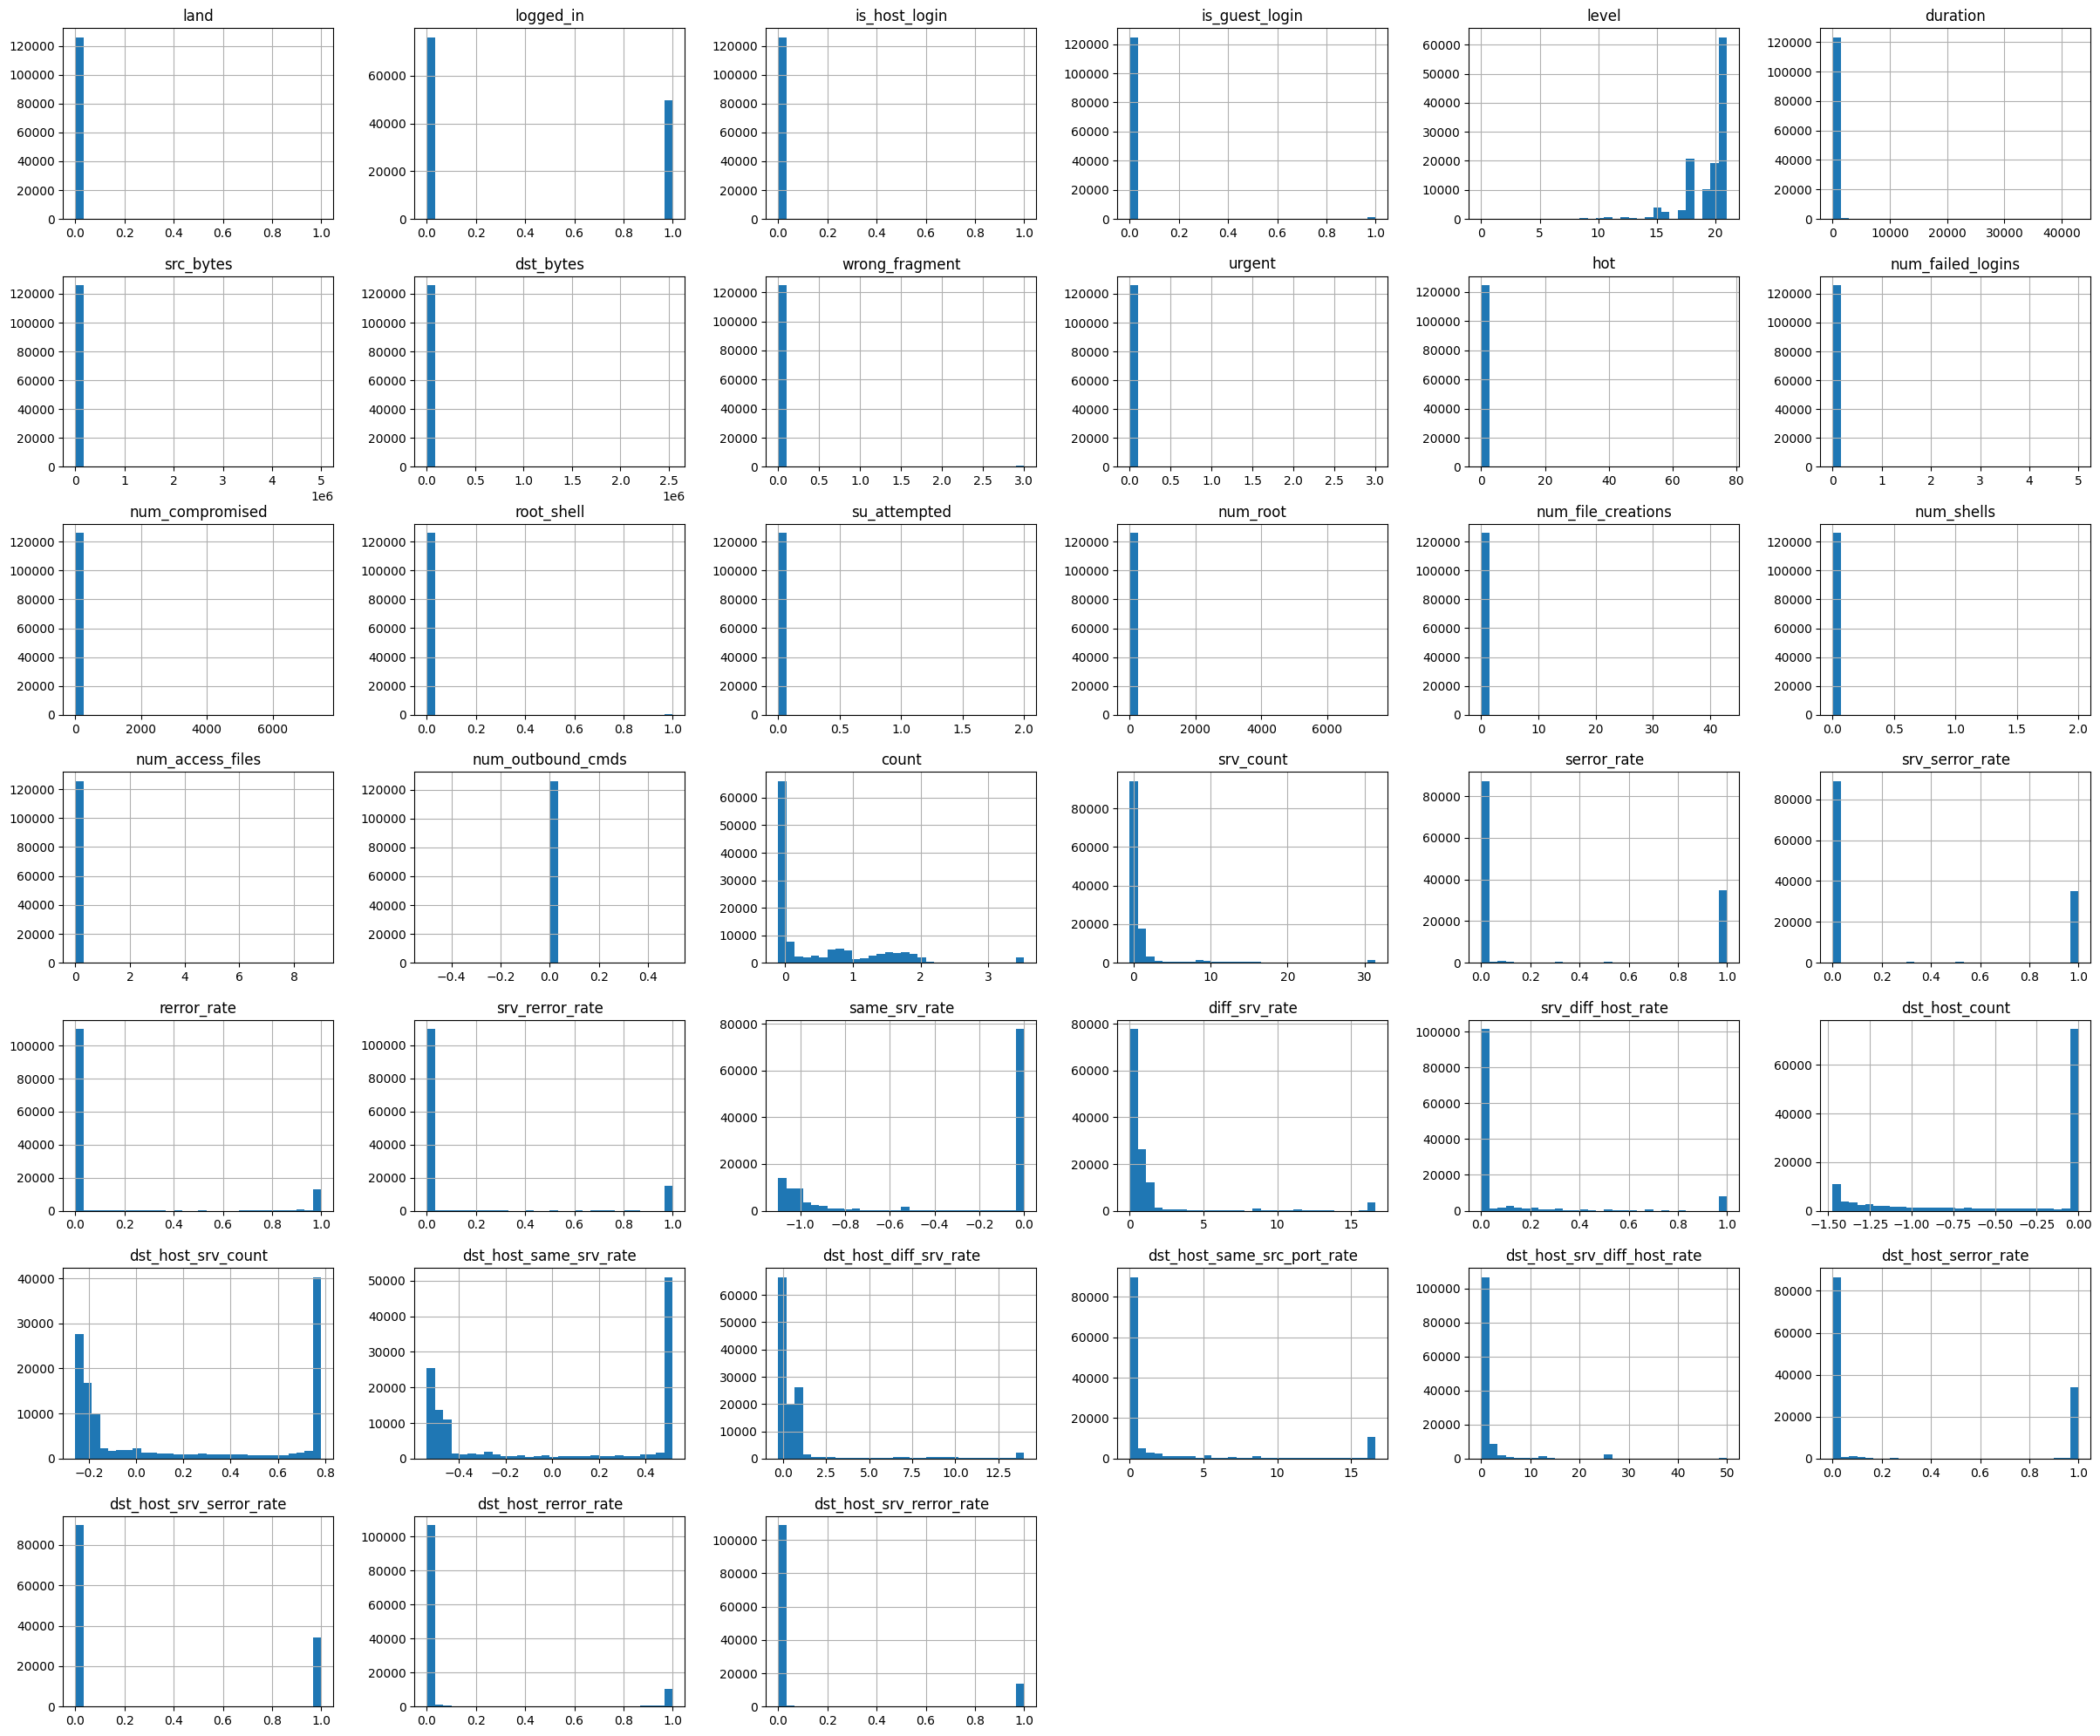

In [27]:
# Histogram
data_train.hist(bins=30, figsize=(30, 25));
plt.show();

<Figure size 2000x4000 with 0 Axes>

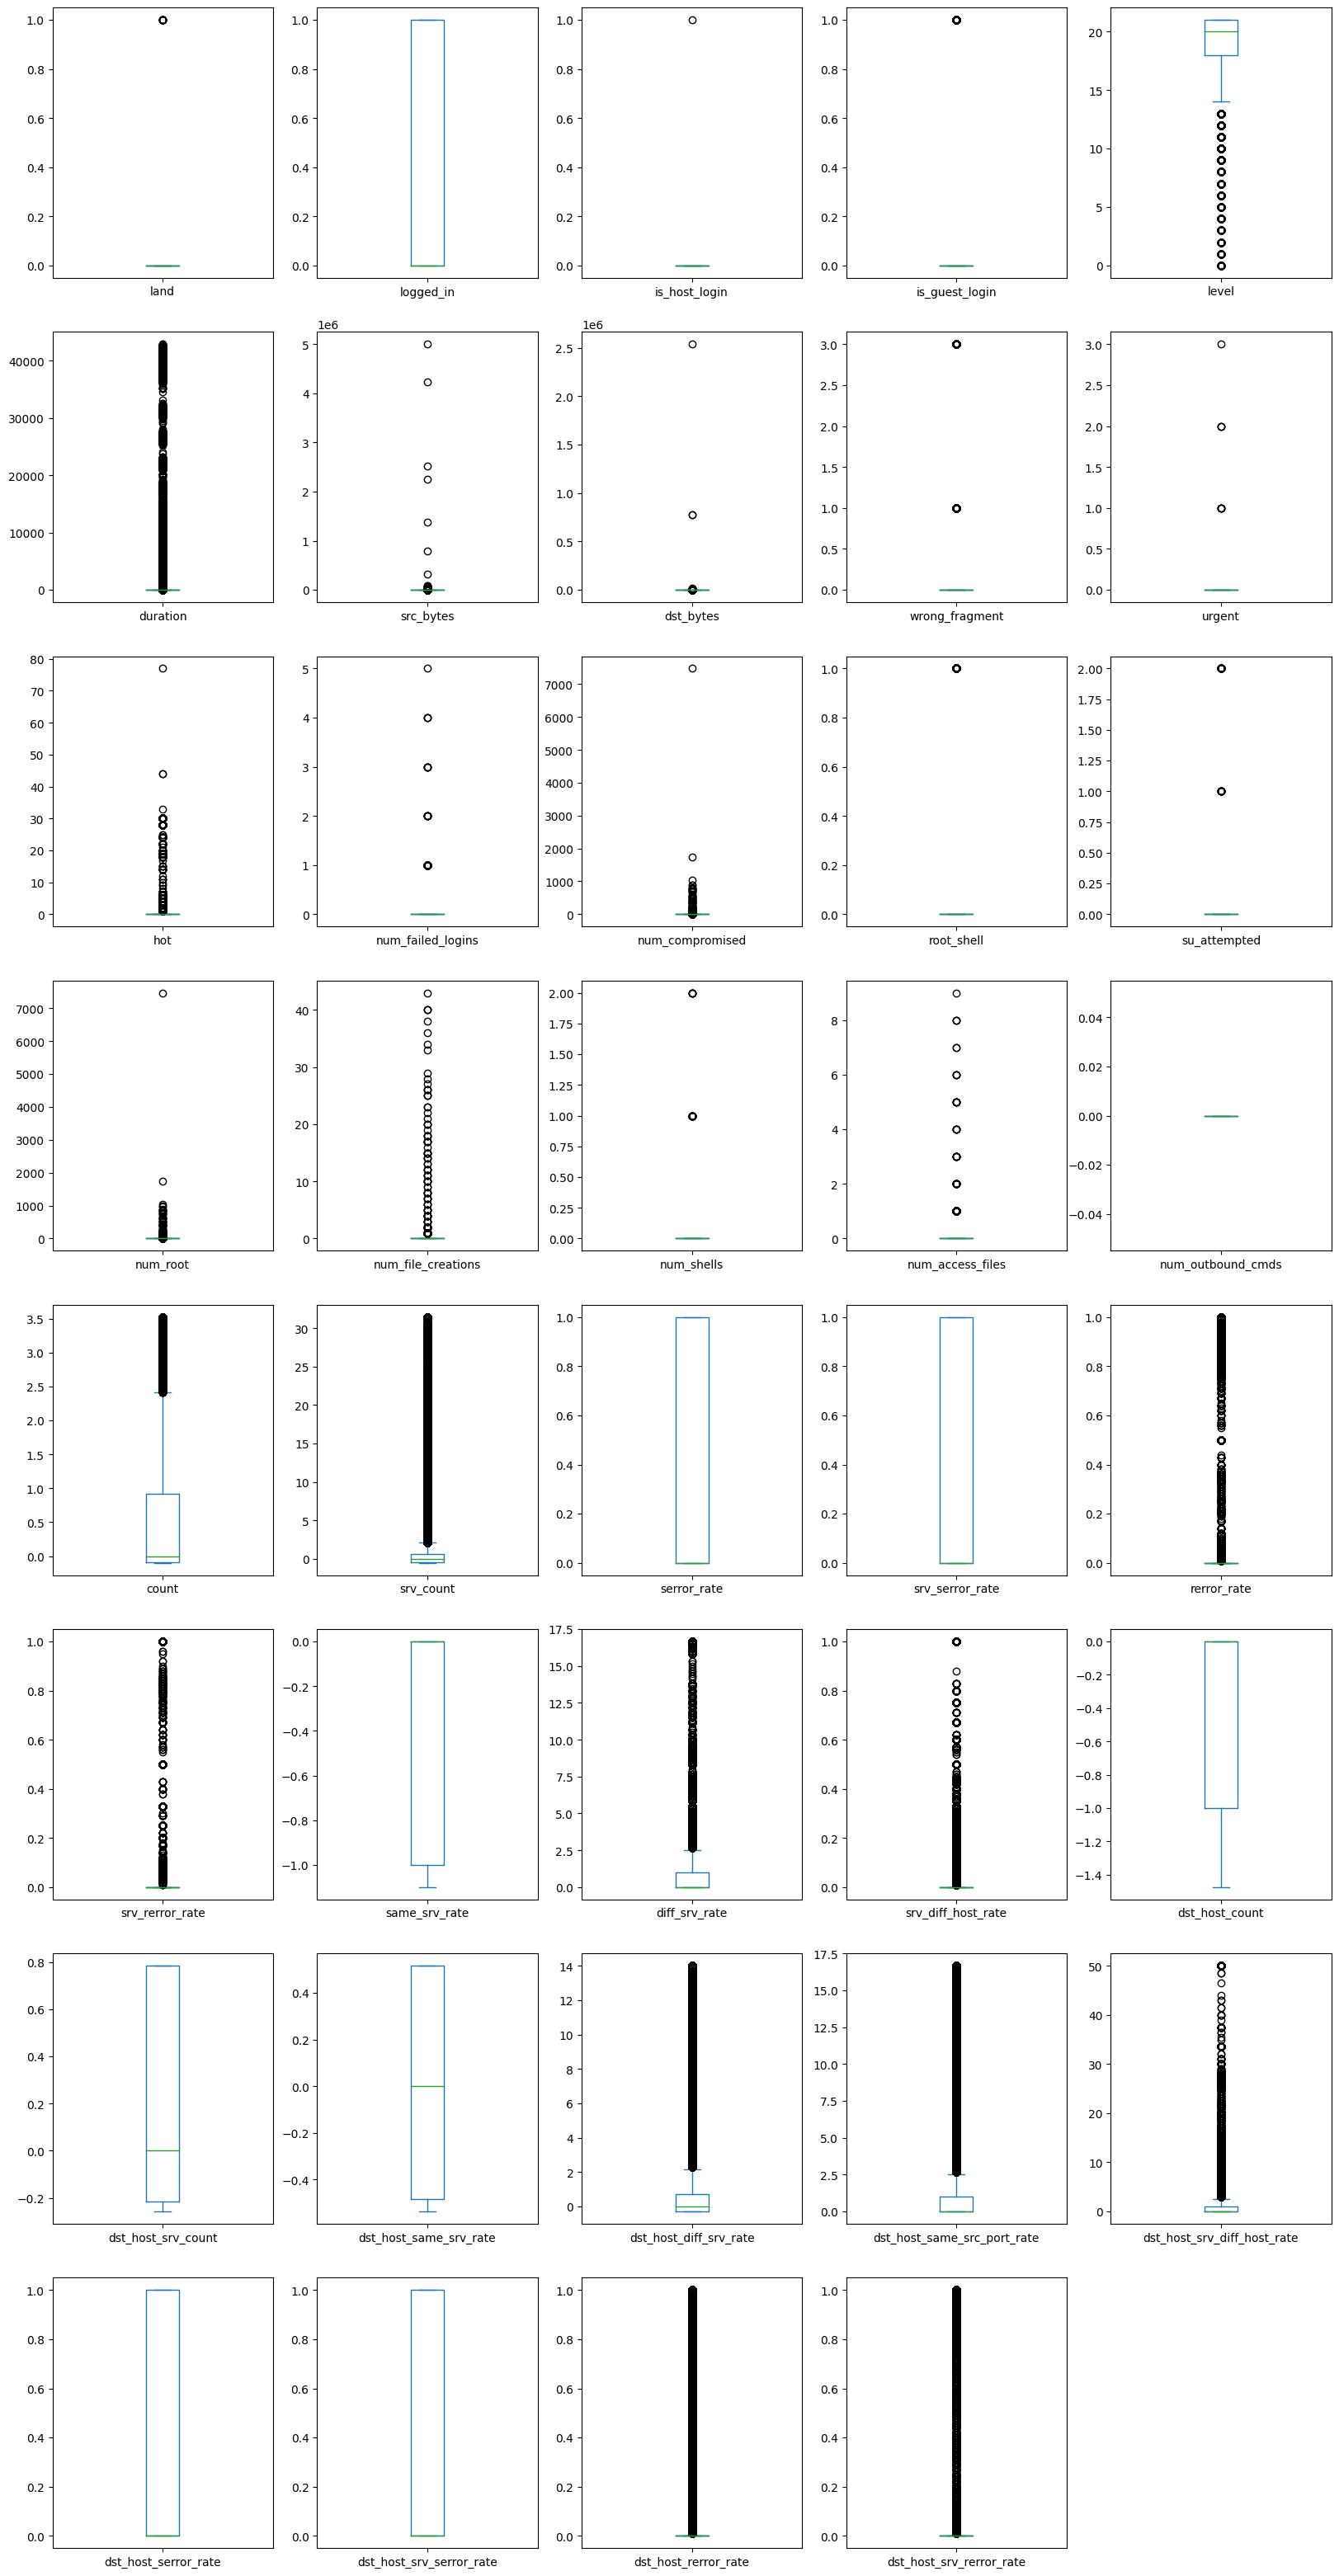

In [28]:
plt.figure(figsize=(20, 40));
data_train.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40));
plt.show();

In [29]:
# Bar Chart Graph
def bar_graph(feature):
    data_train[feature].value_counts().plot(kind="bar")

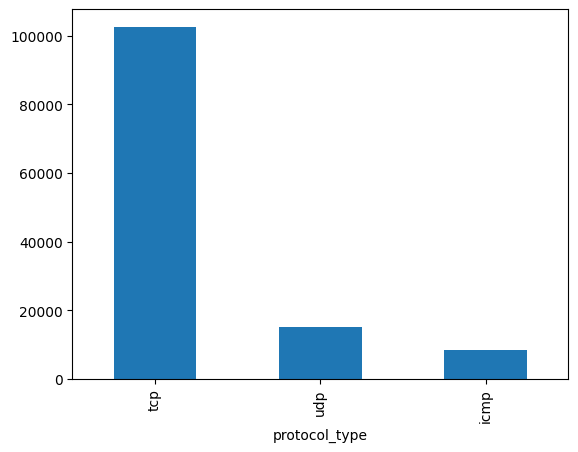

In [30]:
bar_graph('protocol_type')

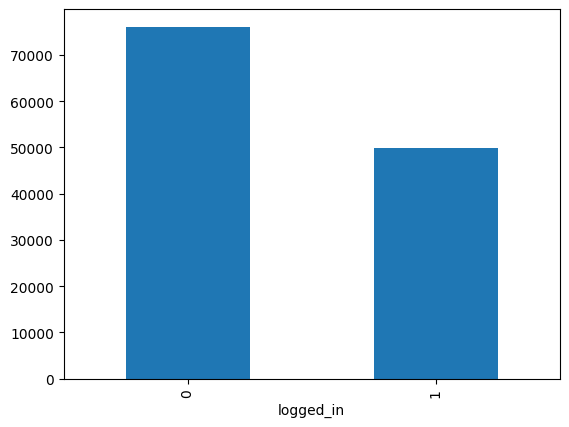

In [31]:
bar_graph('logged_in')
# logged_in (1 if successfully logged in; 0 otherwise): We notice that just 80000 packets are successfully logged in.

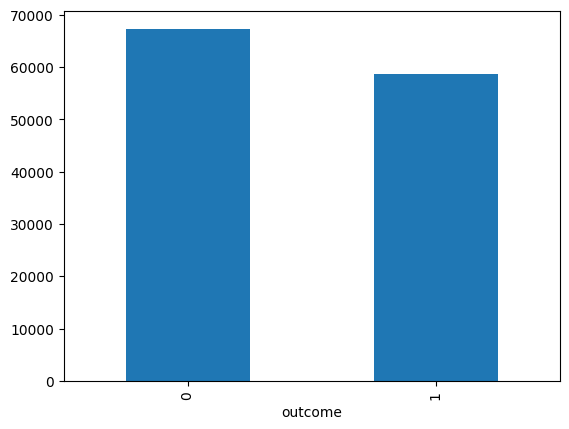

In [34]:
bar_graph('outcome')

In [35]:
# Pie Chart Graph 
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

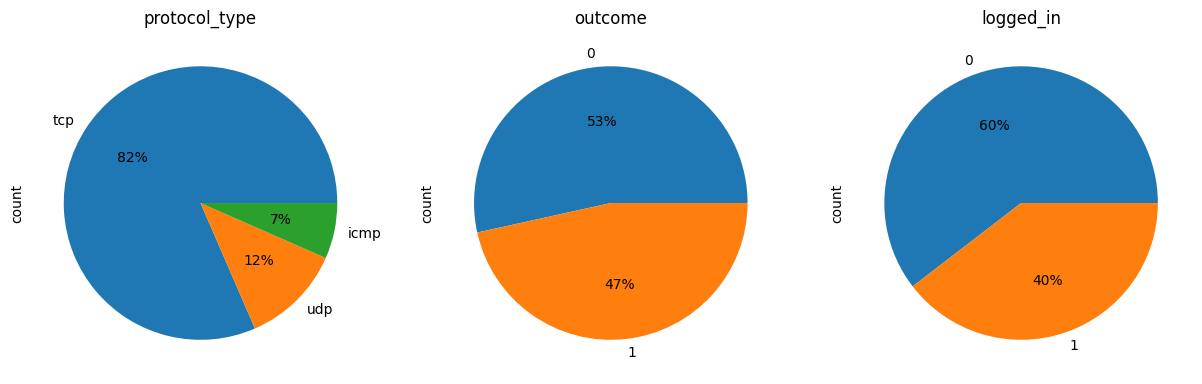

In [36]:
pie_plot(data_train, ['protocol_type', 'outcome', 'logged_in'], 1, 3)

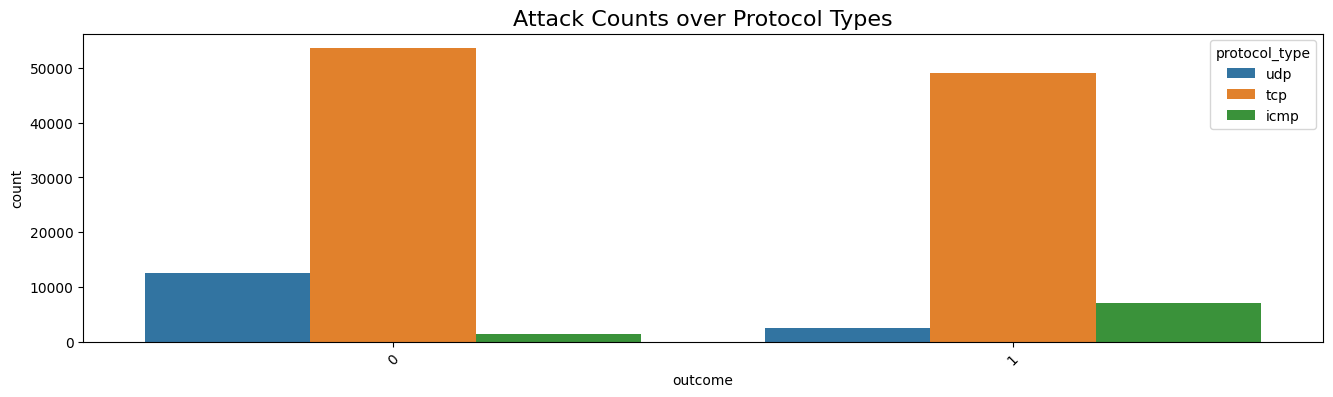

In [37]:
plt.figure(figsize=(16,4))
sns.countplot(x='outcome',data=data_train,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

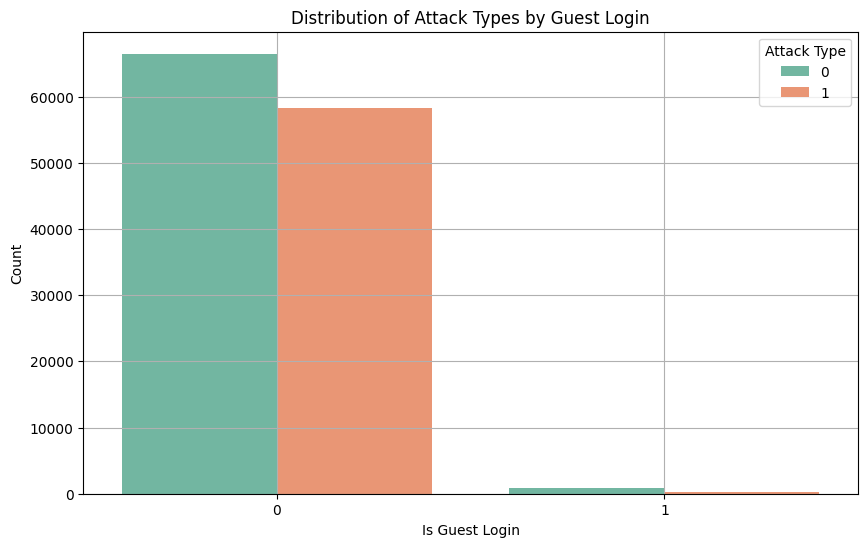

In [38]:
# Distribution of Attack Types by Guest Login
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='outcome', data=data_train, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

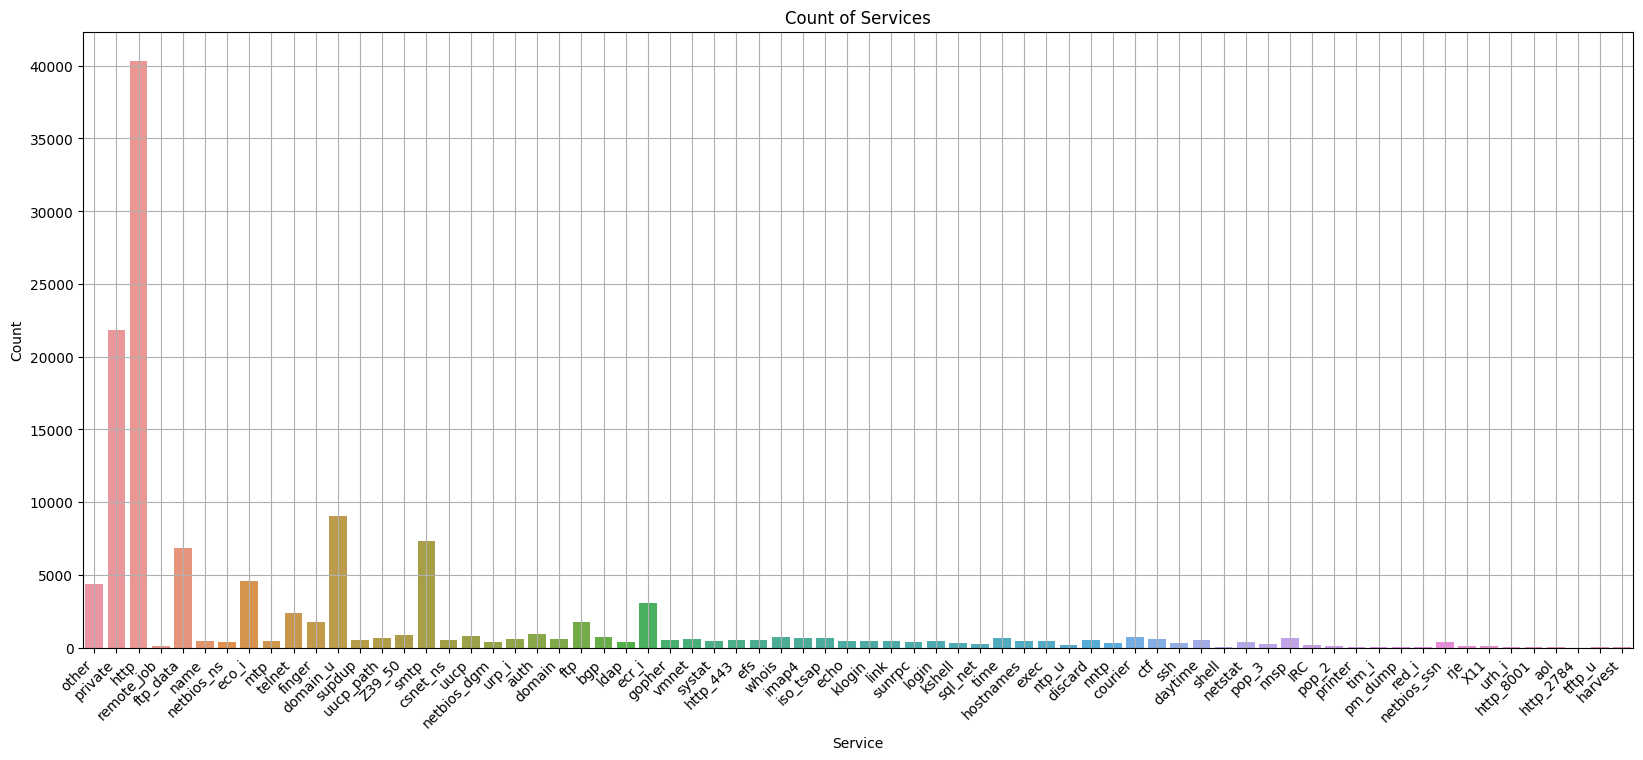

In [32]:
# Service used general
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=data_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

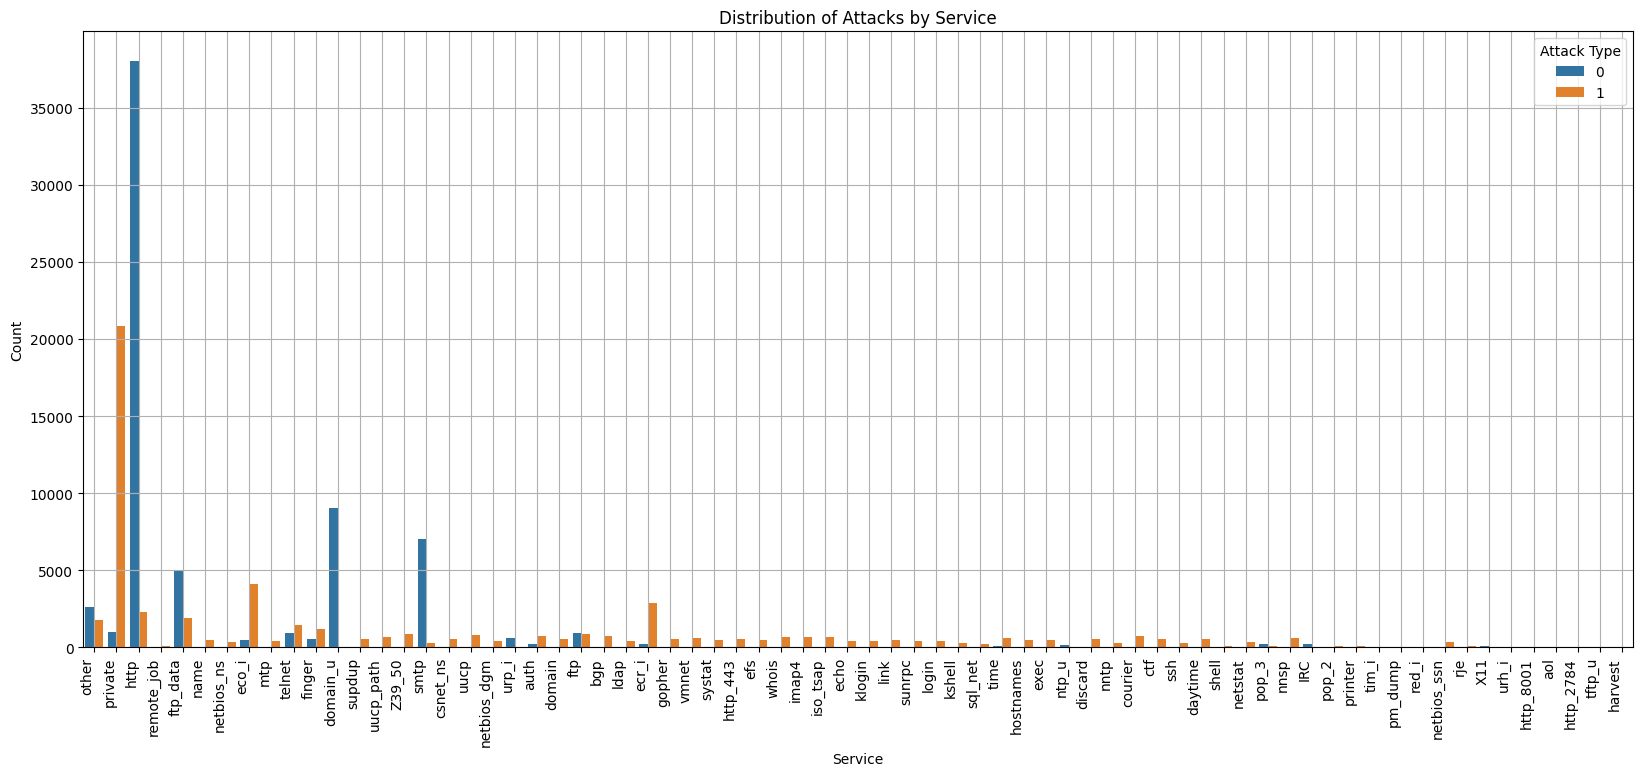

In [33]:
# Service used effect on attacks
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='outcome', data=data_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

# Data Correlation

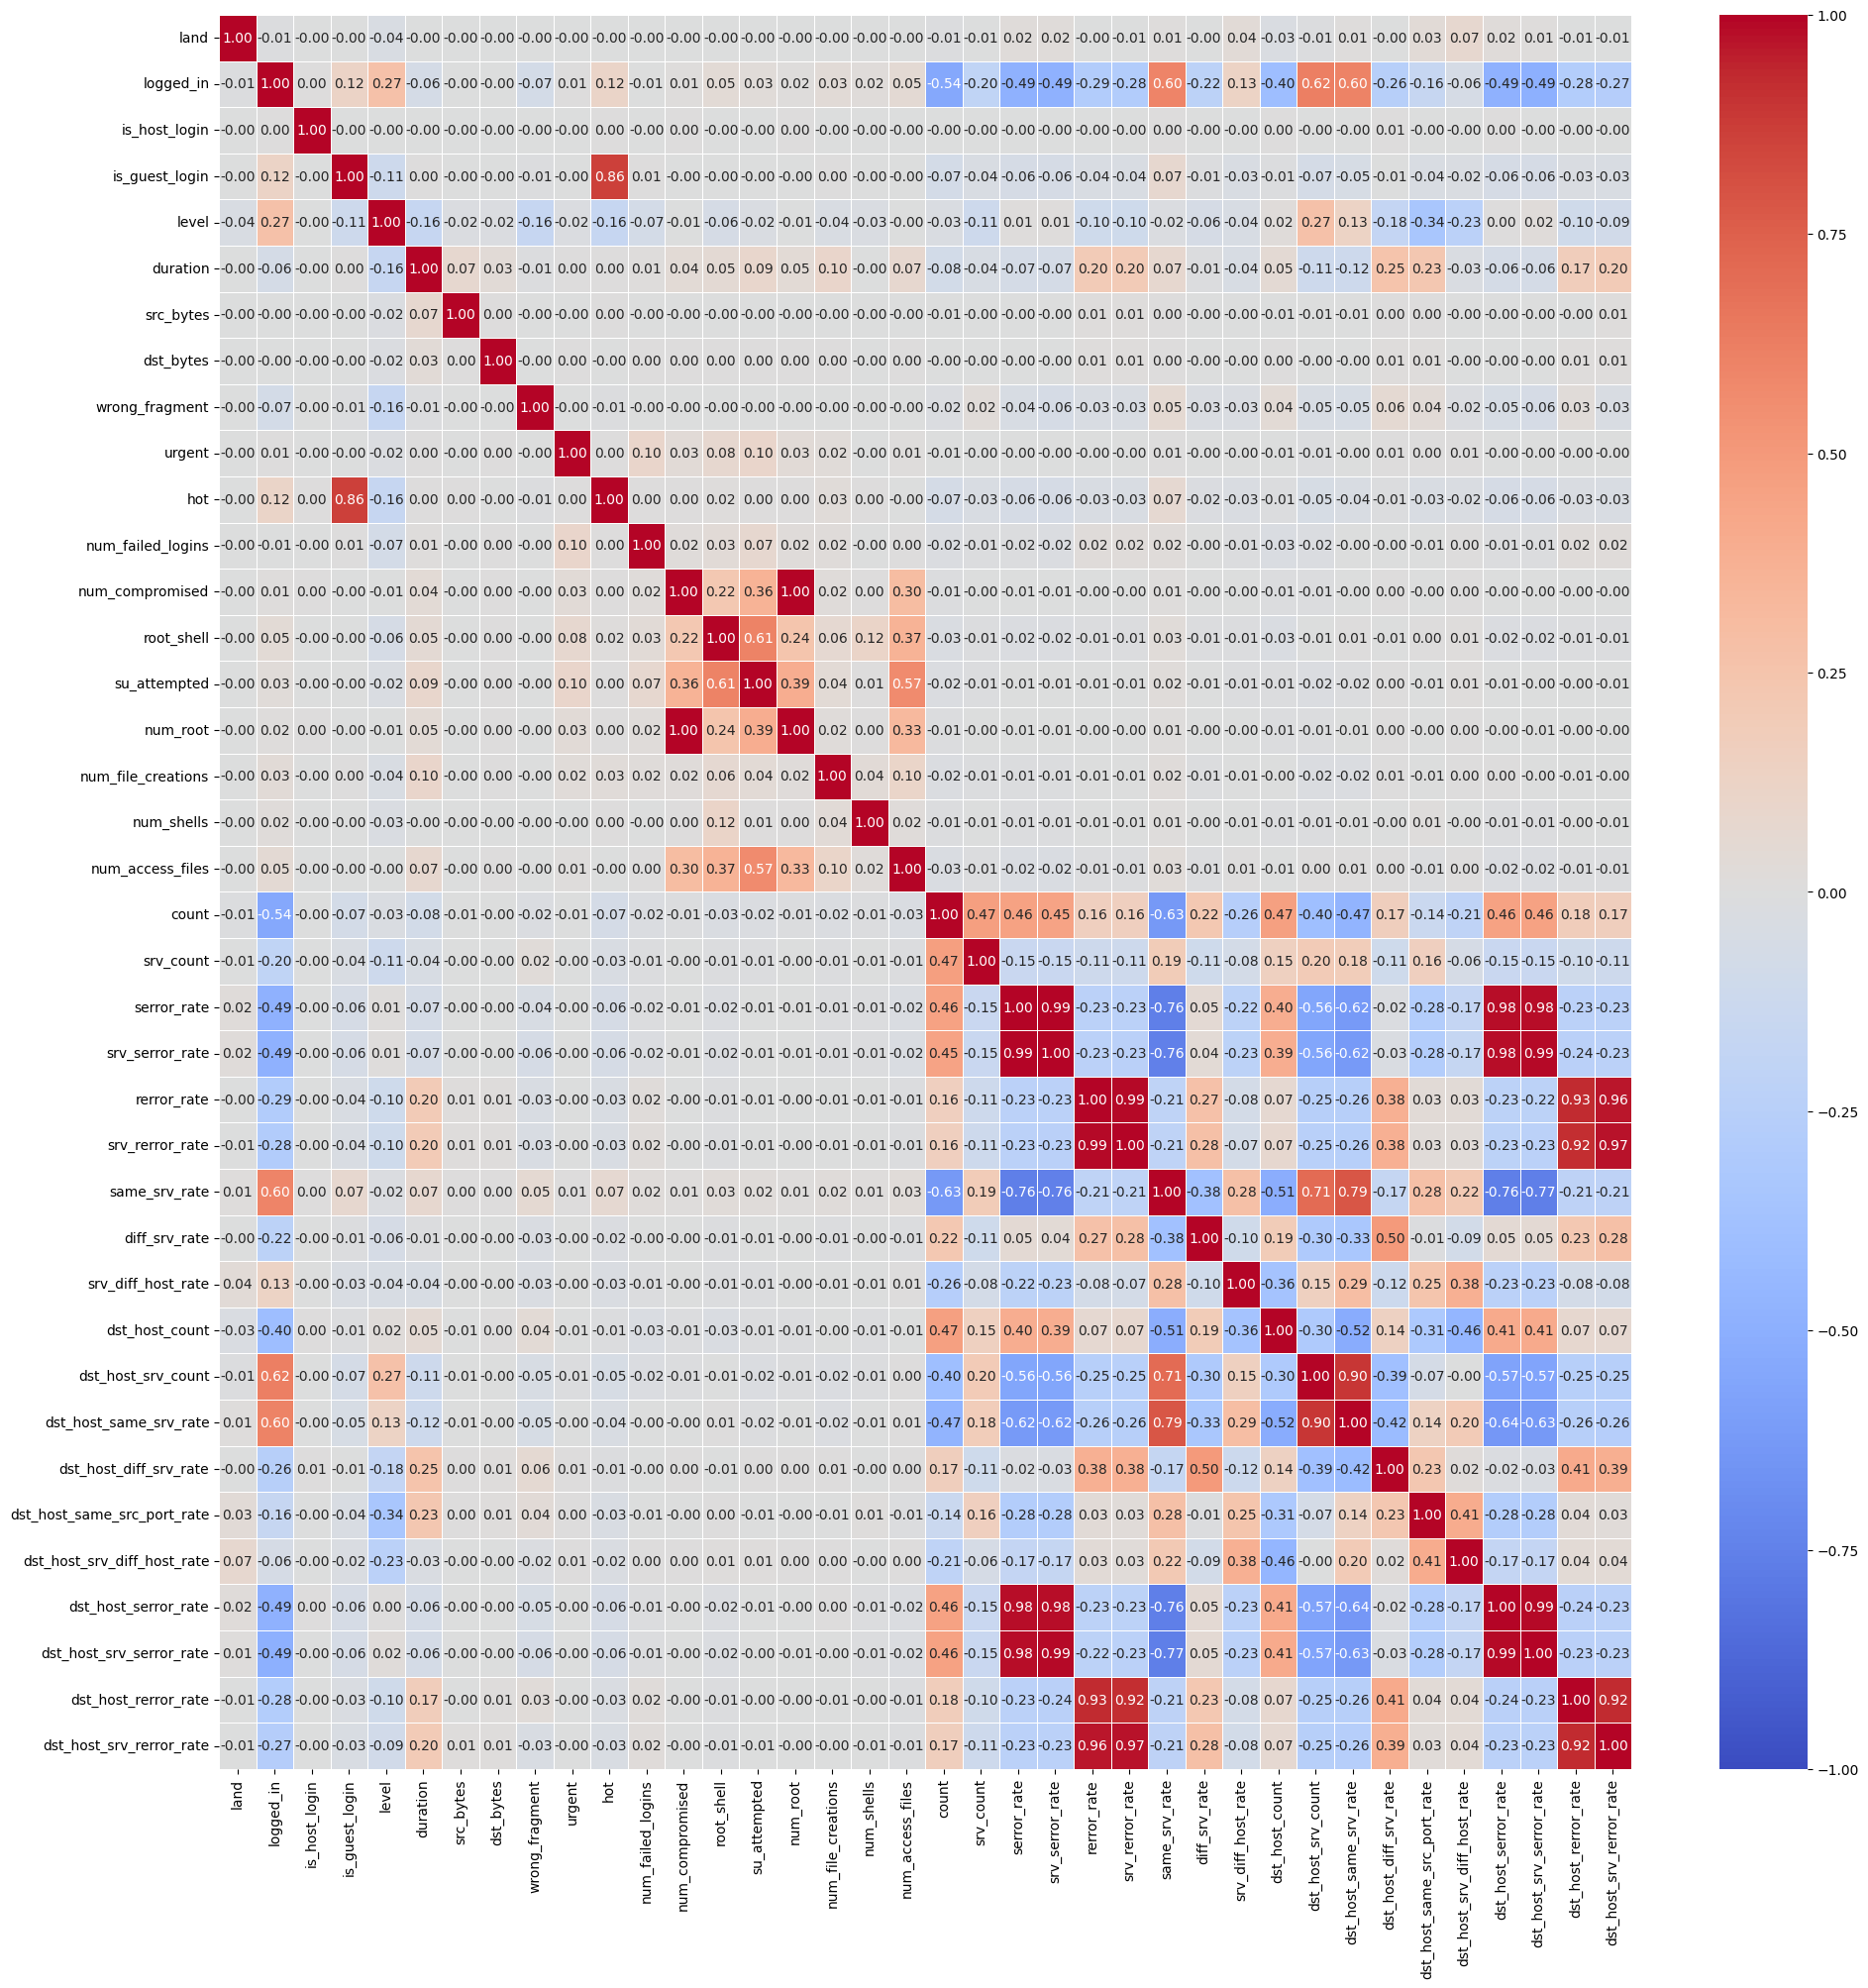

In [34]:
df = data_train.dropna(axis=1)
# Keep columns where there are more than 1 unique value
df = df[[col for col in df if df[col].nunique() > 1]]
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
plt.figure(figsize=(23, 23))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.show()

# Principal Component Analysis

In [35]:
x = scaled_train.drop('outcome' , axis = 1).values
y = scaled_train['outcome'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))
print(x.shape)
print(x_reduced.shape)

Number of original features is 123 and of reduced features is 20
(125972, 123)
(125972, 20)


Information about columns selected by PCA

In [36]:
# Get the loading matrix
loading_matrix = pca.components_

# Create a DataFrame for better visualization
features = scaled_train.drop('outcome', axis=1).columns
loading_df = pd.DataFrame(loading_matrix.T, index=features, columns=[f'PC{i+1}' for i in range(loading_matrix.shape[0])])

# Sum the absolute values of the loadings for each feature across all principal components
loading_sums = loading_df.abs().sum(axis=1)

# Sort the features by their aggregated influence and select the top 20
top_20_features = loading_sums.sort_values(ascending=False).head(20)

print("Top 20 contributing features across all principal components:")
print(top_20_features)

Top 20 contributing features across all principal components:
count                          2.683755
dst_host_same_src_port_rate    2.331103
level                          2.323202
diff_srv_rate                  2.282635
dst_host_diff_srv_rate         2.256442
dst_host_count                 2.235342
dst_host_srv_diff_host_rate    2.073506
srv_count                      1.987120
hot                            1.831851
service_private                1.757176
logged_in                      1.670781
service_http                   1.581862
num_compromised                1.513548
num_root                       1.509106
flag_SF                        1.404925
dst_host_srv_count             1.379109
dst_host_same_srv_rate         1.367859
num_file_creations             1.208715
protocol_type_udp              1.109871
srv_serror_rate                1.042316
dtype: float64


# Data Splitting

In [37]:
y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

# Classification Method

In [45]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

# Classification outcome column (Using Original Columns)

Note: X ==> All Columns except(outcome, level)  Y ==> outcome Column

Logistic Regression

Training Accuracy Logistic Regression 90.36089583932842  Test Accuracy Logistic Regression 90.29172454852153
Training Precesion Logistic Regression 90.25231596988696  Test Precesion Logistic Regression 90.340370529944
Training Recall Logistic Regression 88.84902073855748  Test Recall Logistic Regression 88.77974426285037


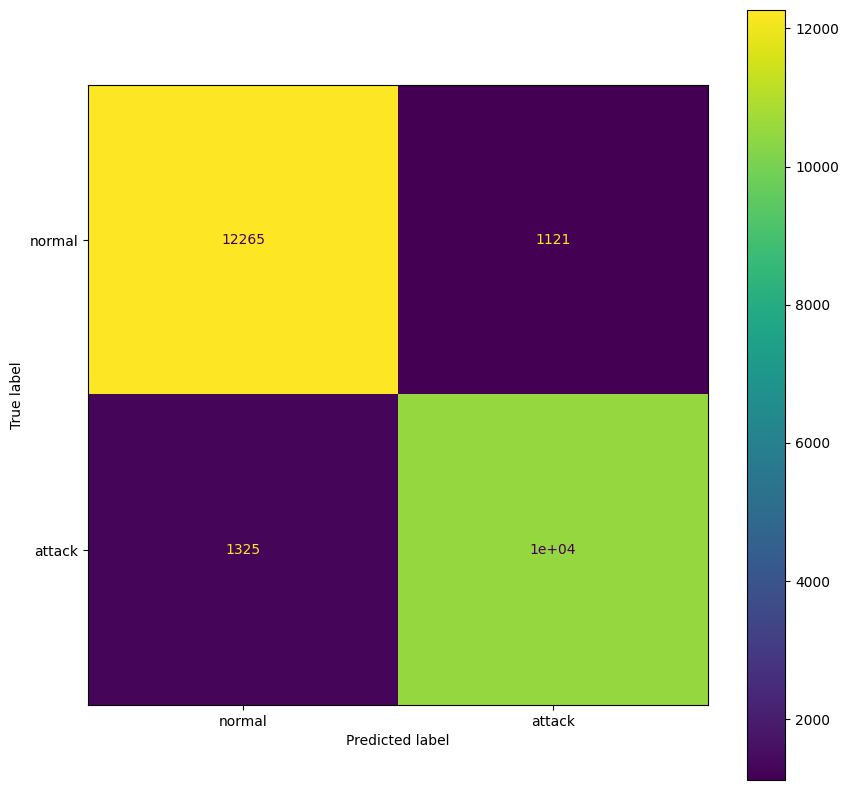

In [47]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

k-nearest neighbors

Training Accuracy KNeighborsClassifier 99.59613800768032  Test Accuracy KNeighborsClassifier 99.3530462393332
Training Precesion KNeighborsClassifier 99.5833689428254  Test Precesion KNeighborsClassifier 99.23063916131214
Training Recall KNeighborsClassifier 99.5472117212362  Test Recall KNeighborsClassifier 99.39029553730205


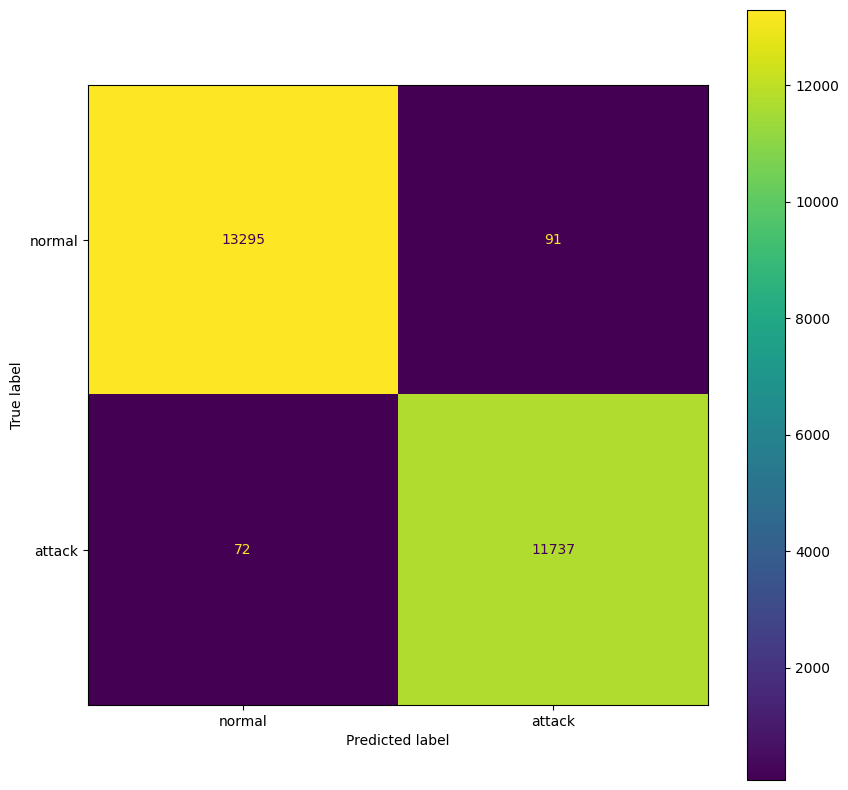

In [48]:
knn = KNeighborsClassifier().fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

Naive Bayes

Training Accuracy Naiive Bayes 93.84284112446292  Test Accuracy Naiive Bayes 93.67334788648542
Training Precesion Naiive Bayes 92.56906888022472  Test Precesion Naiive Bayes 92.43166902052008
Training Recall Naiive Bayes 94.31878857777492  Test Recall Naiive Bayes 94.21627572190701


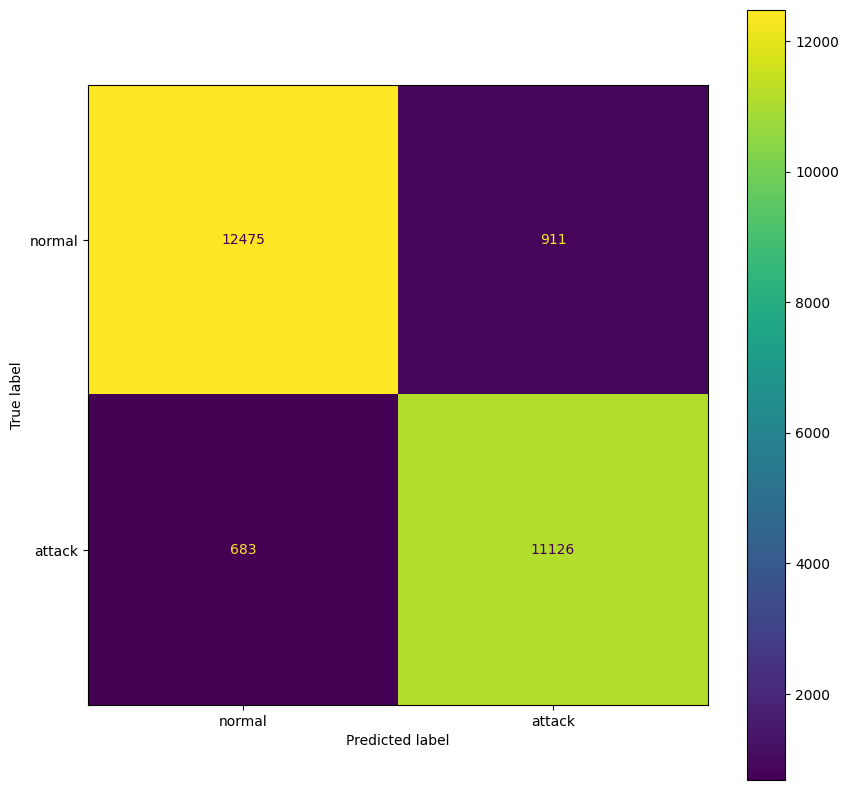

In [49]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "Naiive Bayes", x_train, x_test, y_train, y_test)

Support Vector Machines

Training Accuracy Linear SVC 98.73086120841064  Test Accuracy Linear SVC 98.70212343718991
Training Precesion Linear SVC 98.35223170679916  Test Precesion Linear SVC 98.30865028609895
Training Recall Linear SVC 98.92569573481984  Test Recall Linear SVC 98.9330171902786


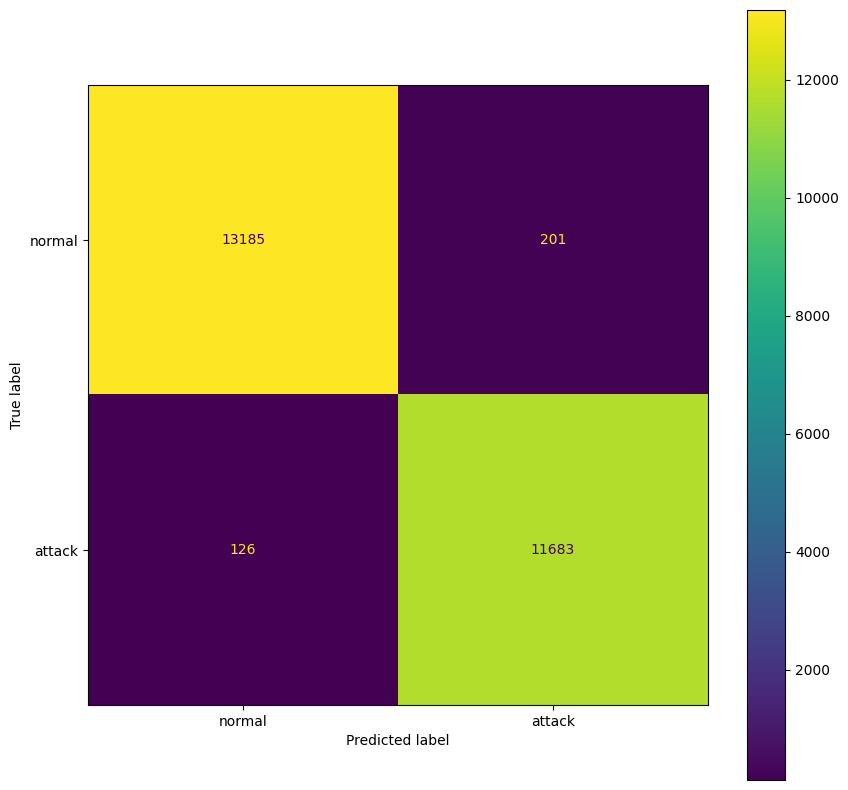

In [50]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC", x_train, x_test, y_train, y_test)

Decision Tree

Training Accuracy Decision Tree 100.0  Test Accuracy Decision Tree 99.9047430045644
Training Precesion Decision Tree 100.0  Test Precesion Decision Tree 99.86460184479986
Training Recall Decision Tree 100.0  Test Recall Decision Tree 99.93225505970022


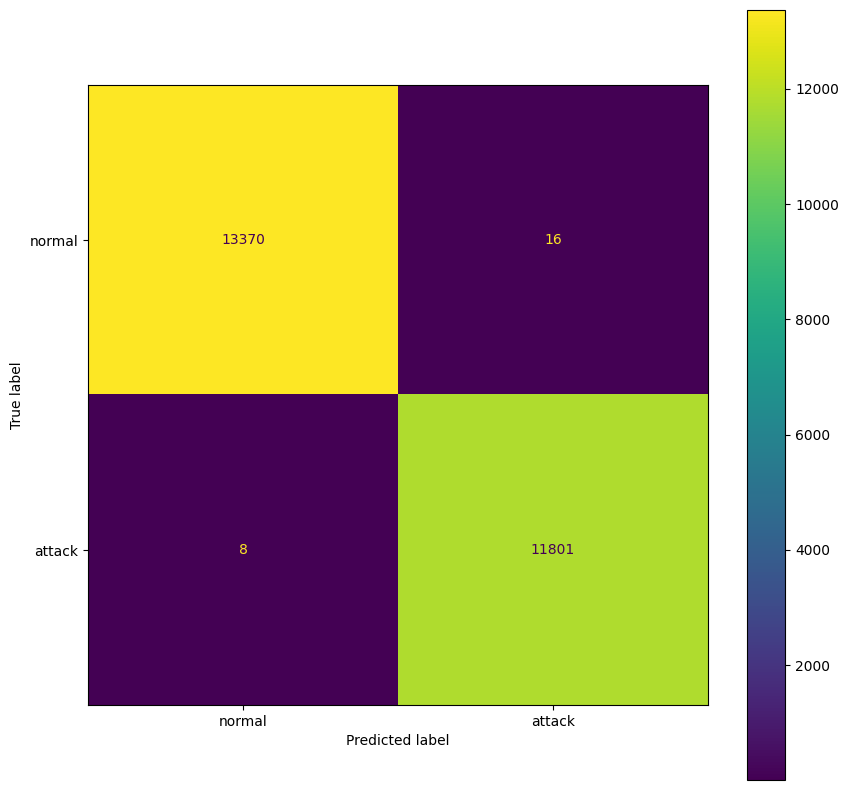

In [54]:
dt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(dt, "Decision Tree", x_train, x_test, y_train, y_test)

Check Overfitting and Handle it

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 40, 'criterion': 'gini'}
Training Accuracy Decision Tree with Best Params 99.98313107157387  Test Accuracy Decision Tree with Best Params 99.89283588013494
Training Precesion Decision Tree with Best Params 99.98718386876281  Test Precesion Decision Tree with Best Params 99.87301049779886
Training Recall Decision Tree with Best Params 99.97650626855472  Test Recall Decision Tree with Best Params 99.89838258955034


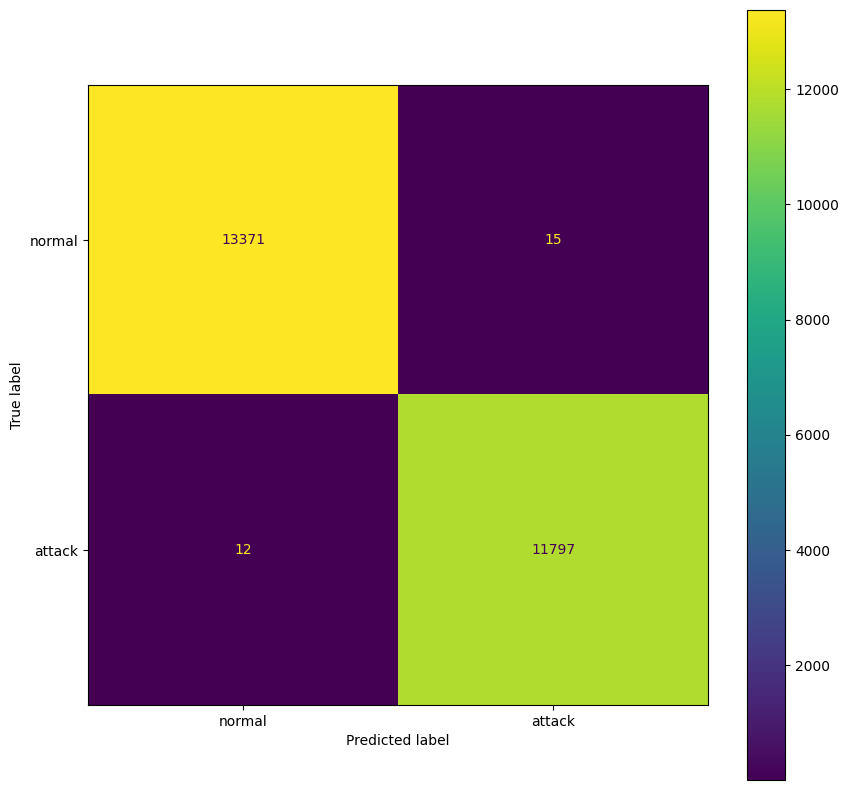

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter grid
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

# Fit the random search model
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Decision Tree with the best parameters
dt_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_best.fit(x_train, y_train)

evaluate_classification(dt_best, "Decision Tree with Best Params", x_train, x_test, y_train, y_test)


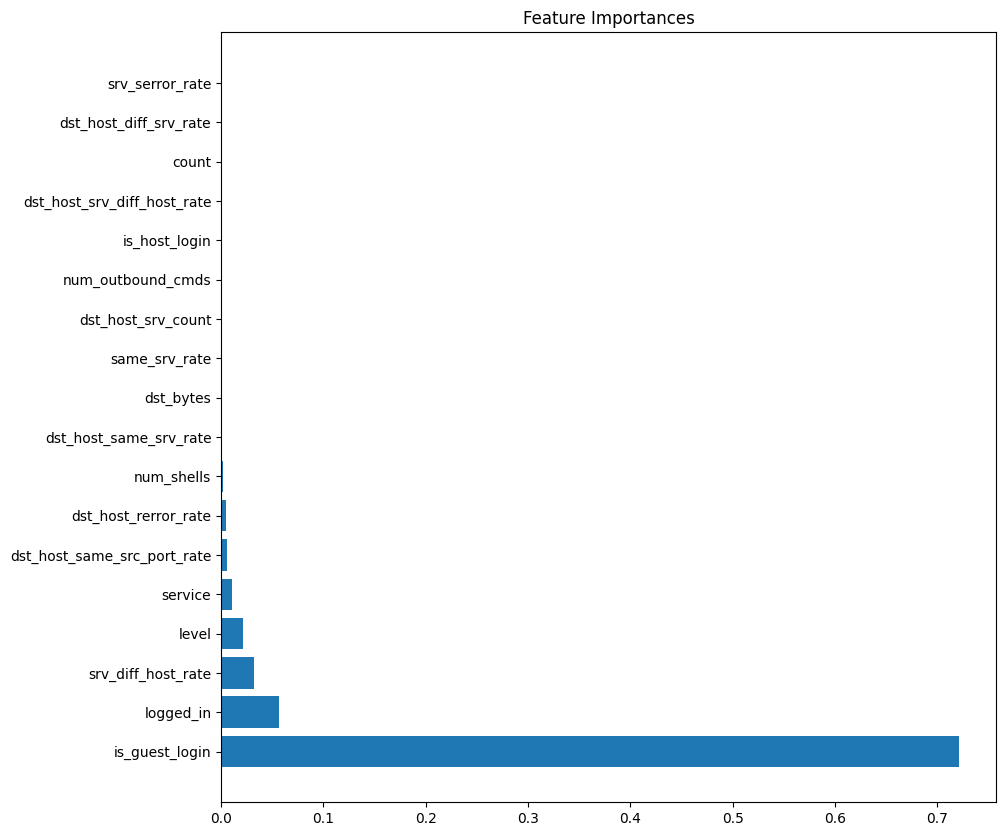

In [59]:
import matplotlib.pyplot as plt
from sklearn.exceptions import NotFittedError

# Function to plot feature importances
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10, 10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('Feature Importances')
    plt.show()

# Features names
features_names = data_train.drop('outcome', axis=1).columns

# Ensure the model is fitted
try:
    # Use the fitted decision tree model dt_best
    f_importances(abs(dt_best.feature_importances_), features_names, top=18)
except NotFittedError as e:
    print(f"Model is not fitted: {e}")

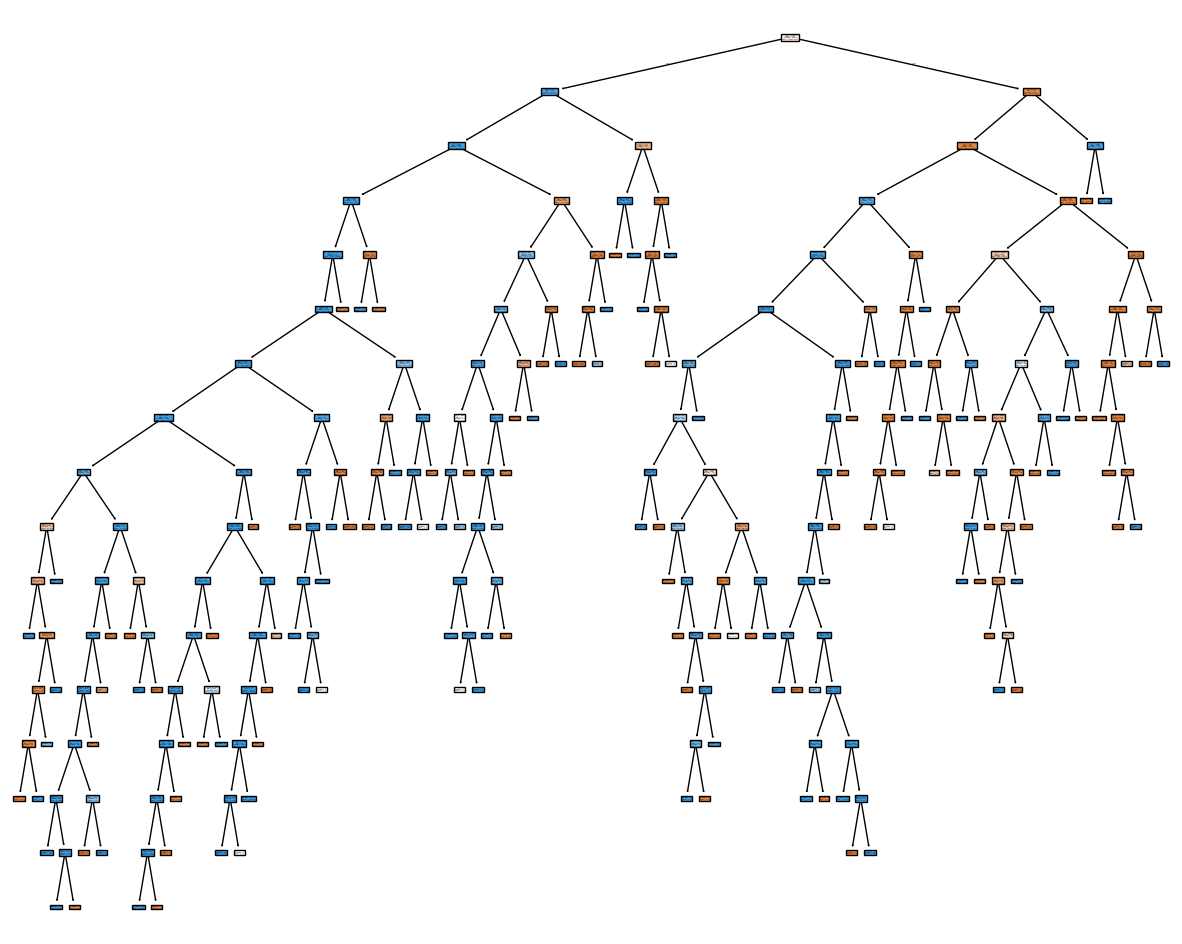

In [62]:
from sklearn.tree import plot_tree
# Plot the fitted decision tree using dt_best
fig = plt.figure(figsize=(15, 12))
plot_tree(dt_best, filled=True)
plt.show()

Random forest

Training Accuracy Random Forest 100.0  Test Accuracy Random Forest 99.95634054375869
Training Precesion Random Forest 100.0  Test Precesion Random Forest 99.94919559695174
Training Recall Random Forest 100.0  Test Recall Random Forest 99.95765941231264


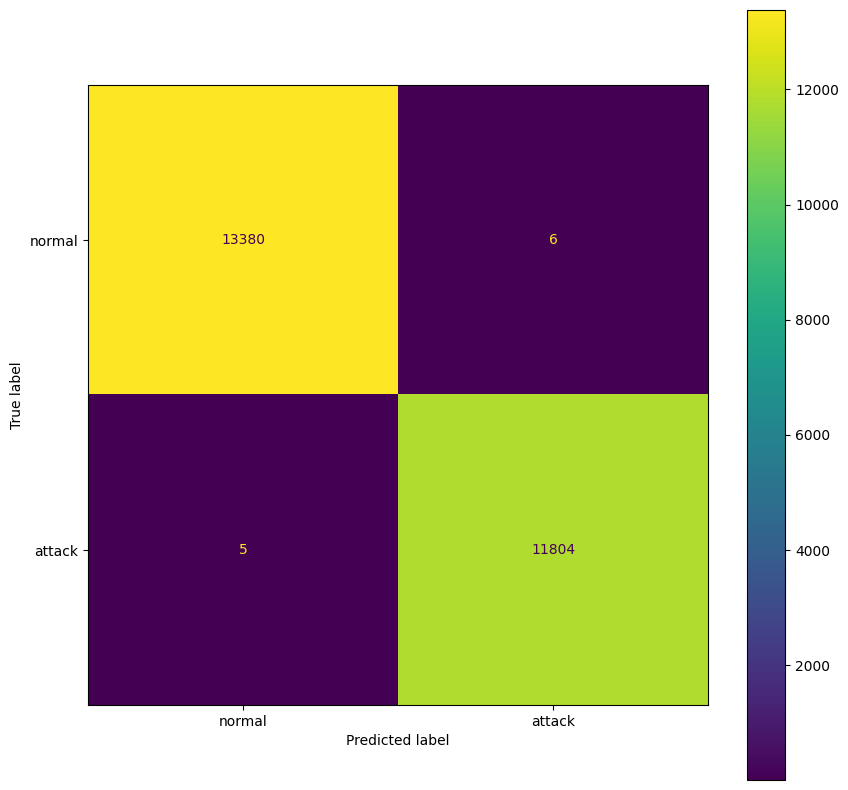

In [63]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "Random Forest", x_train, x_test, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50}
Training Accuracy Random Forest with Best Params 100.0  Test Accuracy Random Forest with Best Params 99.9523715022822
Training Precesion Random Forest with Best Params 100.0  Test Precesion Random Forest with Best Params 99.93227799881487
Training Recall Random Forest with Best Params 100.0  Test Recall Random Forest with Best Params 99.96612752985011


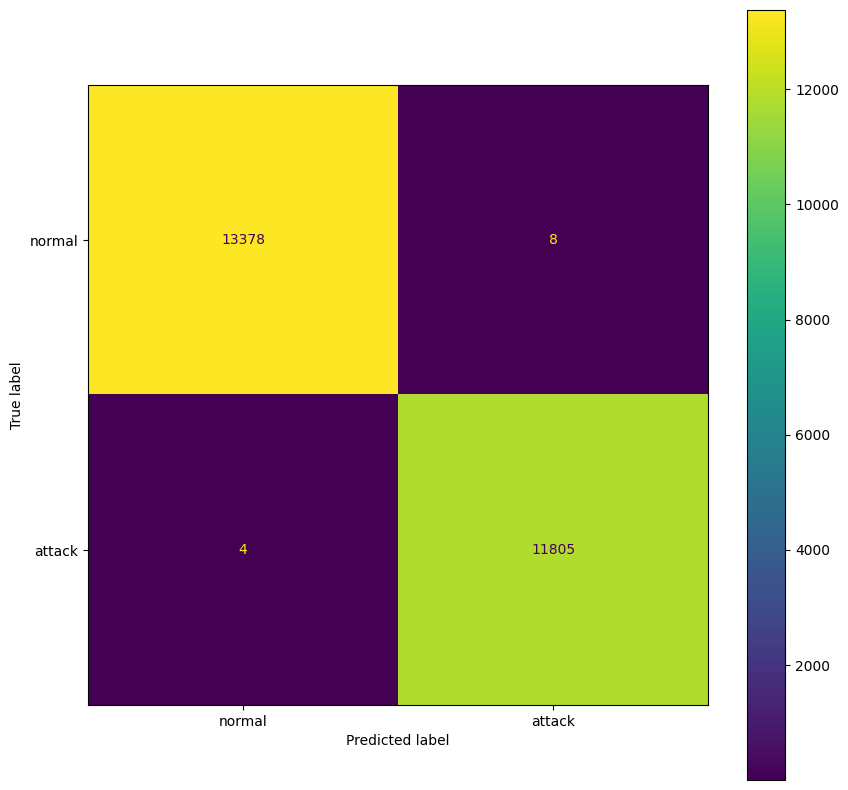

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the randomized search model
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Random Forest with the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(x_train, y_train)

# Evaluate the tuned model
evaluate_classification(rf_best, "Random Forest with Best Params", x_train, x_test, y_train, y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters (Adjusted): {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50}
Training Accuracy Random Forest with Best Params (Adjusted) 99.98015420185162  Test Accuracy Random Forest with Best Params (Adjusted) 99.94046437785275
Training Precesion Random Forest with Best Params (Adjusted) 99.972238238623  Test Precesion Random Forest with Best Params (Adjusted) 99.90690589031821
Training Recall Random Forest with Best Params (Adjusted) 99.98504944362573  Test Recall Random Forest with Best Params (Adjusted) 99.96612752985011


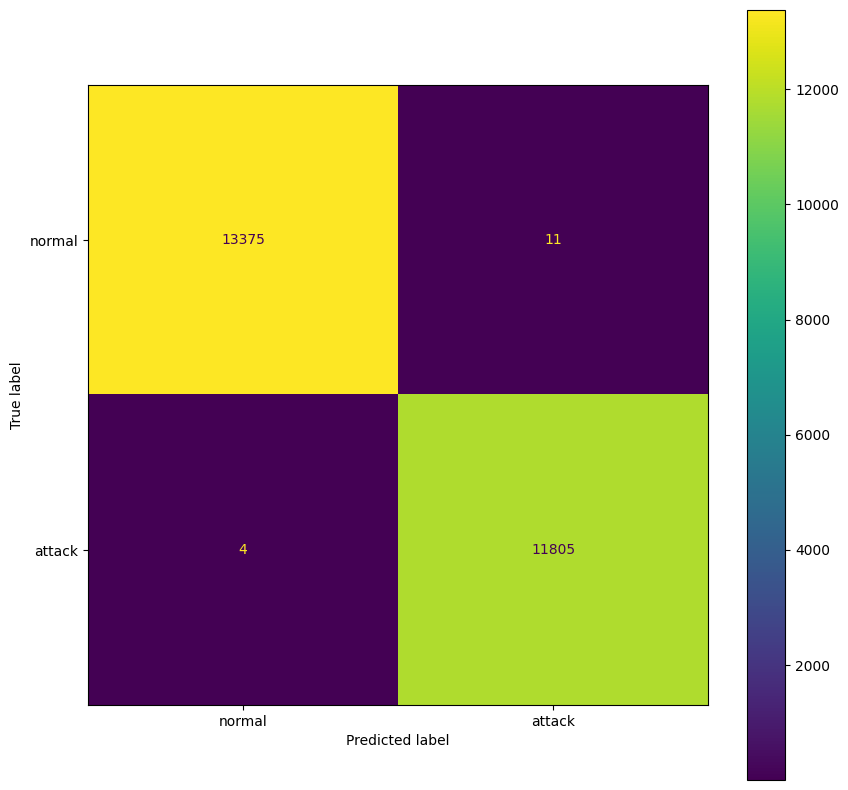

In [68]:
# Adjusted parameter grid for further tuning
param_dist_adjusted = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Classifier
rf_adjusted = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with the adjusted parameters
random_search_adjusted = RandomizedSearchCV(estimator=rf_adjusted, param_distributions=param_dist_adjusted, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the randomized search model
random_search_adjusted.fit(x_train, y_train)

# Get the best parameters
best_params_adjusted = random_search_adjusted.best_params_
print(f"Best parameters (Adjusted): {best_params_adjusted}")

# Train the Random Forest with the adjusted best parameters
rf_best_adjusted = RandomForestClassifier(**best_params_adjusted, random_state=42)
rf_best_adjusted.fit(x_train, y_train)

# Evaluate the tuned model
evaluate_classification(rf_best_adjusted, "Random Forest with Best Params (Adjusted)", x_train, x_test, y_train, y_test)

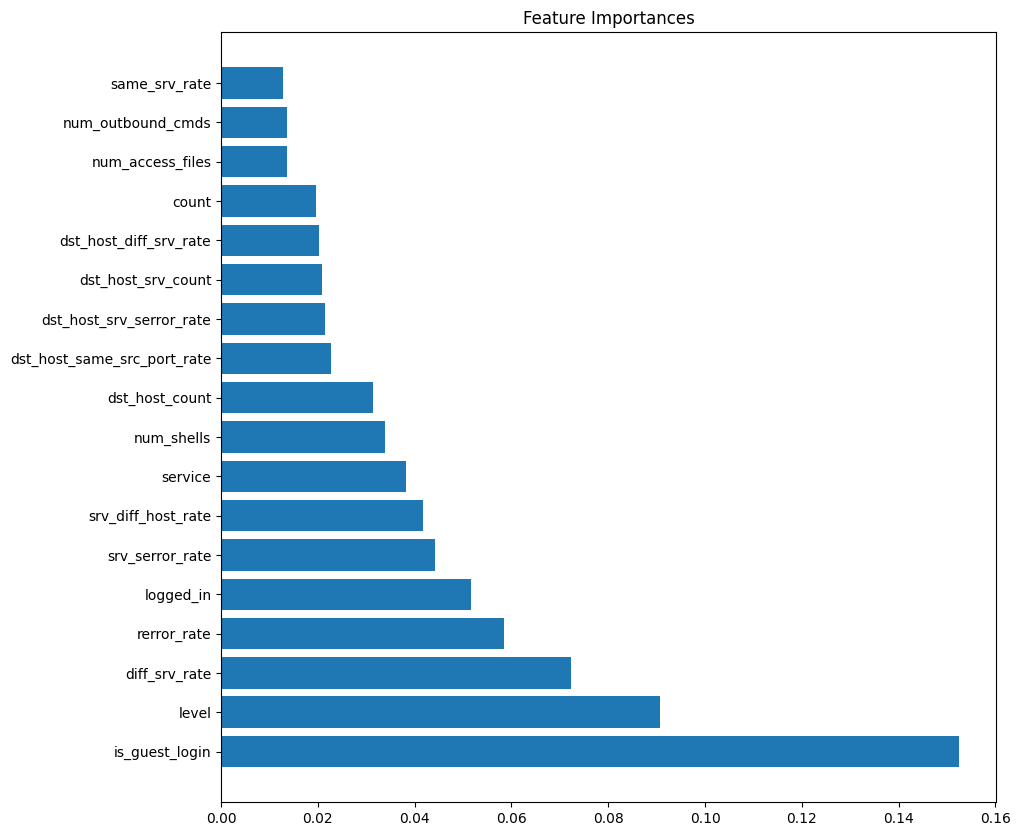

In [69]:
f_importances(abs(rf_best.feature_importances_), features_names, top=18)

XGBoost

Training Accuracy XGBoost 99.97023130277742  Test Accuracy XGBoost 99.93649533637627
Training Precesion XGBoost 99.96796309348369  Test Precesion XGBoost 99.89000761485744
Training Recall XGBoost 99.96796309348369  Test Recall XGBoost 99.97459564738759


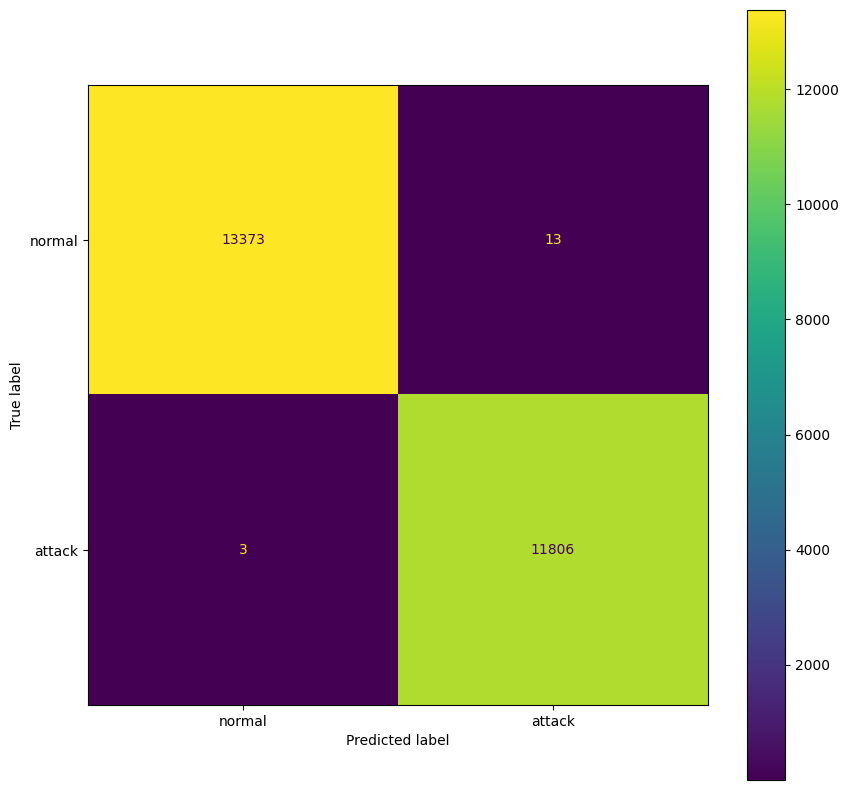

In [70]:
xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20).fit(x_train, y_train)
evaluate_classification(xg, "XGBoost", x_train, x_test, y_train, y_test)

Gradient Boosting Classifier

Training Accuracy Gradient Boosting 99.79360369925678  Test Accuracy Gradient Boosting 99.72613613812264
Training Precesion Gradient Boosting 99.6463947172223  Test Precesion Gradient Boosting 99.51079622132254
Training Recall Gradient Boosting 99.91029666175434  Test Recall Gradient Boosting 99.90685070708781


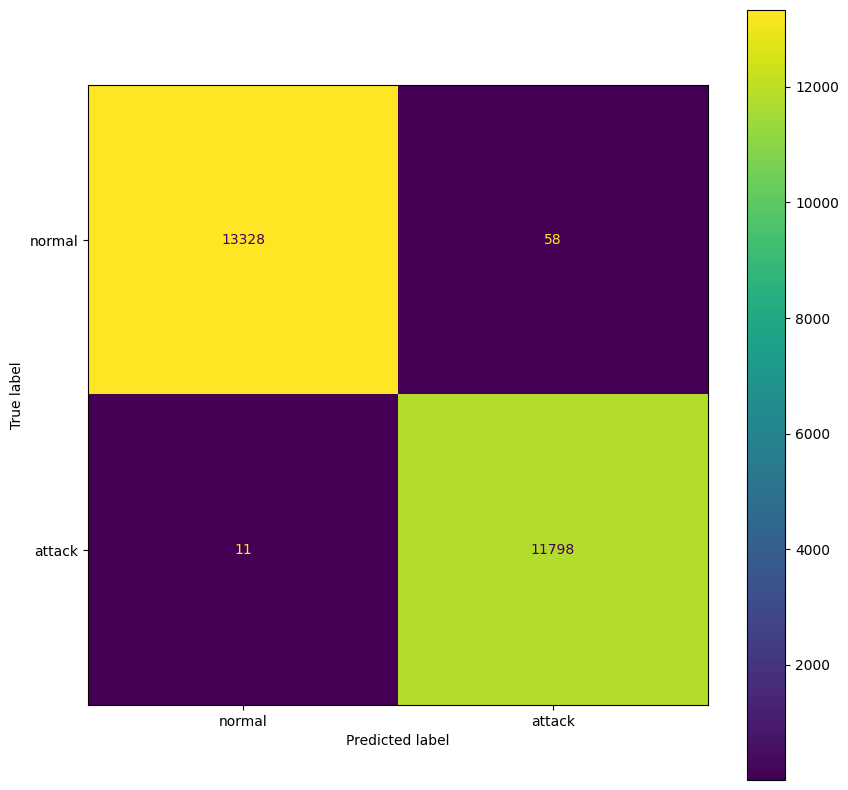

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42).fit(x_train, y_train)
evaluate_classification(gb, "Gradient Boosting", x_train, x_test, y_train, y_test)

Recurrent Neural Network (RNN) ==> (5 Epochs)

In [72]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Ensure that x_train and x_test are in float format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train, epochs=5, batch_size=64, validation_data=(X_test_rnn, y_test))

Epoch 1/5
1575/1575 [==============================] - 78s 40ms/step - loss: 0.0890 - accuracy: 0.9688 - val_loss: 0.0401 - val_accuracy: 0.9868
Epoch 2/5
1575/1575 [==============================] - 61s 39ms/step - loss: 0.0754 - accuracy: 0.9744 - val_loss: 0.0783 - val_accuracy: 0.9731
Epoch 3/5
1575/1575 [==============================] - 61s 39ms/step - loss: 0.1009 - accuracy: 0.9655 - val_loss: 0.0694 - val_accuracy: 0.9821
Epoch 4/5
1575/1575 [==============================] - 59s 38ms/step - loss: 0.0593 - accuracy: 0.9811 - val_loss: 0.0559 - val_accuracy: 0.9830
Epoch 5/5
1575/1575 [==============================] - 59s 37ms/step - loss: 0.0671 - accuracy: 0.9783 - val_loss: 0.0790 - val_accuracy: 0.9726


Convolutional Neural Network (CNN) ==> (5 Epochs)

In [73]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Ensure the data is in float32 format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train, epochs=5, batch_size=64, validation_data=(X_test_cnn, y_test))

Epoch 1/5
1575/1575 [==============================] - 49s 14ms/step - loss: 1.1646 - accuracy: 0.9752 - val_loss: 1.3754 - val_accuracy: 0.9836
Epoch 2/5
1575/1575 [==============================] - 24s 15ms/step - loss: 0.6962 - accuracy: 0.9843 - val_loss: 0.3085 - val_accuracy: 0.9873
Epoch 3/5
1575/1575 [==============================] - 22s 14ms/step - loss: 0.3216 - accuracy: 0.9858 - val_loss: 5.6819 - val_accuracy: 0.9881
Epoch 4/5
1575/1575 [==============================] - 22s 14ms/step - loss: 0.5659 - accuracy: 0.9819 - val_loss: 0.8050 - val_accuracy: 0.9860
Epoch 5/5
1575/1575 [==============================] - 22s 14ms/step - loss: 0.0979 - accuracy: 0.9845 - val_loss: 0.2334 - val_accuracy: 0.9863


In [74]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 97.26%
CNN Test Accuracy: 98.63%


Recurrent Neural Network (RNN) ==> (10 Epochs)

In [75]:
# Ensure that x_train and x_test are in float format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train, epochs= 10, batch_size=64, validation_data=(X_test_rnn, y_test))

Epoch 1/10
1575/1575 [==============================] - 59s 36ms/step - loss: 0.0937 - accuracy: 0.9691 - val_loss: 0.0568 - val_accuracy: 0.9822
Epoch 2/10
1575/1575 [==============================] - 57s 36ms/step - loss: 0.0729 - accuracy: 0.9758 - val_loss: 0.1138 - val_accuracy: 0.9565
Epoch 3/10
1575/1575 [==============================] - 58s 37ms/step - loss: 0.0801 - accuracy: 0.9729 - val_loss: 0.0876 - val_accuracy: 0.9734
Epoch 4/10
1575/1575 [==============================] - 59s 38ms/step - loss: 0.0655 - accuracy: 0.9785 - val_loss: 0.0731 - val_accuracy: 0.9750
Epoch 5/10
1575/1575 [==============================] - 58s 37ms/step - loss: 0.0799 - accuracy: 0.9737 - val_loss: 0.0606 - val_accuracy: 0.9800
Epoch 6/10
1575/1575 [==============================] - 59s 37ms/step - loss: 0.0619 - accuracy: 0.9798 - val_loss: 0.0747 - val_accuracy: 0.9742
Epoch 7/10
1575/1575 [==============================] - 60s 38ms/step - loss: 0.0708 - accuracy: 0.9762 - val_loss: 0.0684 -

Convolutional Neural Network (CNN) ==> (10 Epochs)

In [76]:
# Ensure the data is in float32 format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test))

Epoch 1/10
1575/1575 [==============================] - 25s 15ms/step - loss: 1.6755 - accuracy: 0.9703 - val_loss: 4.3442 - val_accuracy: 0.9725
Epoch 2/10
1575/1575 [==============================] - 23s 15ms/step - loss: 0.7845 - accuracy: 0.9789 - val_loss: 1.8380 - val_accuracy: 0.9771
Epoch 3/10
1575/1575 [==============================] - 25s 16ms/step - loss: 0.2342 - accuracy: 0.9858 - val_loss: 0.6009 - val_accuracy: 0.9802
Epoch 4/10
1575/1575 [==============================] - 24s 15ms/step - loss: 0.2821 - accuracy: 0.9873 - val_loss: 8.9954 - val_accuracy: 0.9662
Epoch 5/10
1575/1575 [==============================] - 24s 15ms/step - loss: 0.4959 - accuracy: 0.9874 - val_loss: 0.4291 - val_accuracy: 0.9868
Epoch 6/10
1575/1575 [==============================] - 23s 14ms/step - loss: 0.1148 - accuracy: 0.9891 - val_loss: 4.7531 - val_accuracy: 0.9915
Epoch 7/10
1575/1575 [==============================] - 22s 14ms/step - loss: 0.3413 - accuracy: 0.9899 - val_loss: 0.4771 -

In [77]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 96.18%
CNN Test Accuracy: 99.51%


Recurrent Neural Network (RNN) ==> (50 Epochs)

In [78]:
# Ensure that x_train and x_test are in float format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train, epochs= 50, batch_size=64, validation_data=(X_test_rnn, y_test))

Epoch 1/50
1575/1575 [==============================] - 63s 38ms/step - loss: 0.0900 - accuracy: 0.9712 - val_loss: 0.0589 - val_accuracy: 0.9830
Epoch 2/50
1575/1575 [==============================] - 58s 37ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.1180 - val_accuracy: 0.9523
Epoch 3/50
1575/1575 [==============================] - 60s 38ms/step - loss: 0.0541 - accuracy: 0.9834 - val_loss: 0.0555 - val_accuracy: 0.9831
Epoch 4/50
1575/1575 [==============================] - 56s 35ms/step - loss: 0.0657 - accuracy: 0.9789 - val_loss: 0.0789 - val_accuracy: 0.9756
Epoch 5/50
1575/1575 [==============================] - 57s 36ms/step - loss: 0.0641 - accuracy: 0.9797 - val_loss: 0.1167 - val_accuracy: 0.9675
Epoch 6/50
1575/1575 [==============================] - 58s 37ms/step - loss: 0.0559 - accuracy: 0.9830 - val_loss: 0.0450 - val_accuracy: 0.9876
Epoch 7/50
1575/1575 [==============================] - 55s 35ms/step - loss: 0.1641 - accuracy: 0.9437 - val_loss: 0.1996 -

Convolutional Neural Network (CNN) ==> (50 Epochs)

In [79]:
# Ensure the data is in float32 format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train, epochs = 50, batch_size=64, validation_data=(X_test_cnn, y_test))

Epoch 1/50
1575/1575 [==============================] - 28s 16ms/step - loss: 2.0741 - accuracy: 0.9746 - val_loss: 1.0796 - val_accuracy: 0.9840
Epoch 2/50
1575/1575 [==============================] - 24s 15ms/step - loss: 0.8056 - accuracy: 0.9818 - val_loss: 0.6542 - val_accuracy: 0.9808
Epoch 3/50
1575/1575 [==============================] - 24s 15ms/step - loss: 0.1539 - accuracy: 0.9848 - val_loss: 0.4300 - val_accuracy: 0.9862
Epoch 4/50
1575/1575 [==============================] - 25s 16ms/step - loss: 0.1205 - accuracy: 0.9860 - val_loss: 0.3037 - val_accuracy: 0.9913
Epoch 5/50
1575/1575 [==============================] - 25s 16ms/step - loss: 0.4562 - accuracy: 0.9860 - val_loss: 0.3106 - val_accuracy: 0.9915
Epoch 6/50
1575/1575 [==============================] - 24s 15ms/step - loss: 0.1138 - accuracy: 0.9881 - val_loss: 0.3343 - val_accuracy: 0.9925
Epoch 7/50
1575/1575 [==============================] - 24s 15ms/step - loss: 0.0934 - accuracy: 0.9885 - val_loss: 3.7227 -

In [81]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 91.43%
CNN Test Accuracy: 99.77%


Recurrent Neural Network (RNN) ==> (100 Epochs)

In [82]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Ensure that x_train and x_test are in float format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train, epochs = 100, batch_size=64, validation_data=(X_test_rnn, y_test))

Epoch 1/100
1575/1575 [==============================] - 58s 35ms/step - loss: 0.0914 - accuracy: 0.9721 - val_loss: 0.0609 - val_accuracy: 0.9797
Epoch 2/100
1575/1575 [==============================] - 55s 35ms/step - loss: 0.0581 - accuracy: 0.9824 - val_loss: 0.1342 - val_accuracy: 0.9617
Epoch 3/100
1575/1575 [==============================] - 54s 35ms/step - loss: 0.0524 - accuracy: 0.9843 - val_loss: 0.0384 - val_accuracy: 0.9886
Epoch 4/100
1575/1575 [==============================] - 55s 35ms/step - loss: 0.0923 - accuracy: 0.9671 - val_loss: 0.1999 - val_accuracy: 0.9312
Epoch 5/100
1575/1575 [==============================] - 56s 36ms/step - loss: 0.1842 - accuracy: 0.9343 - val_loss: 0.1135 - val_accuracy: 0.9646
Epoch 6/100
1575/1575 [==============================] - 55s 35ms/step - loss: 0.2429 - accuracy: 0.9058 - val_loss: 0.2706 - val_accuracy: 0.8743
Epoch 7/100
1575/1575 [==============================] - 54s 34ms/step - loss: 0.2631 - accuracy: 0.9017 - val_loss: 0

Convolutional Neural Network (CNN) ==> (100 Epochs)

In [83]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Ensure the data is in float32 format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train, epochs = 100, batch_size=64, validation_data=(X_test_cnn, y_test))

Epoch 1/100
1575/1575 [==============================] - 26s 15ms/step - loss: 2.0654 - accuracy: 0.9765 - val_loss: 0.9637 - val_accuracy: 0.9710
Epoch 2/100
1575/1575 [==============================] - 21s 13ms/step - loss: 1.5950 - accuracy: 0.9827 - val_loss: 8.5916 - val_accuracy: 0.9864
Epoch 3/100
1575/1575 [==============================] - 21s 13ms/step - loss: 1.0136 - accuracy: 0.9838 - val_loss: 0.5010 - val_accuracy: 0.9898
Epoch 4/100
1575/1575 [==============================] - 21s 14ms/step - loss: 0.2089 - accuracy: 0.9875 - val_loss: 0.3998 - val_accuracy: 0.9843
Epoch 5/100
1575/1575 [==============================] - 22s 14ms/step - loss: 0.2239 - accuracy: 0.9889 - val_loss: 0.0543 - val_accuracy: 0.9933
Epoch 6/100
1575/1575 [==============================] - 22s 14ms/step - loss: 1.3973 - accuracy: 0.9861 - val_loss: 1.3925 - val_accuracy: 0.9815
Epoch 7/100
1575/1575 [==============================] - 22s 14ms/step - loss: 0.3013 - accuracy: 0.9891 - val_loss: 0

In [84]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 88.04%
CNN Test Accuracy: 98.91%


# Comparison Between Model (outcome classifcation without using PCA)

Accuracy

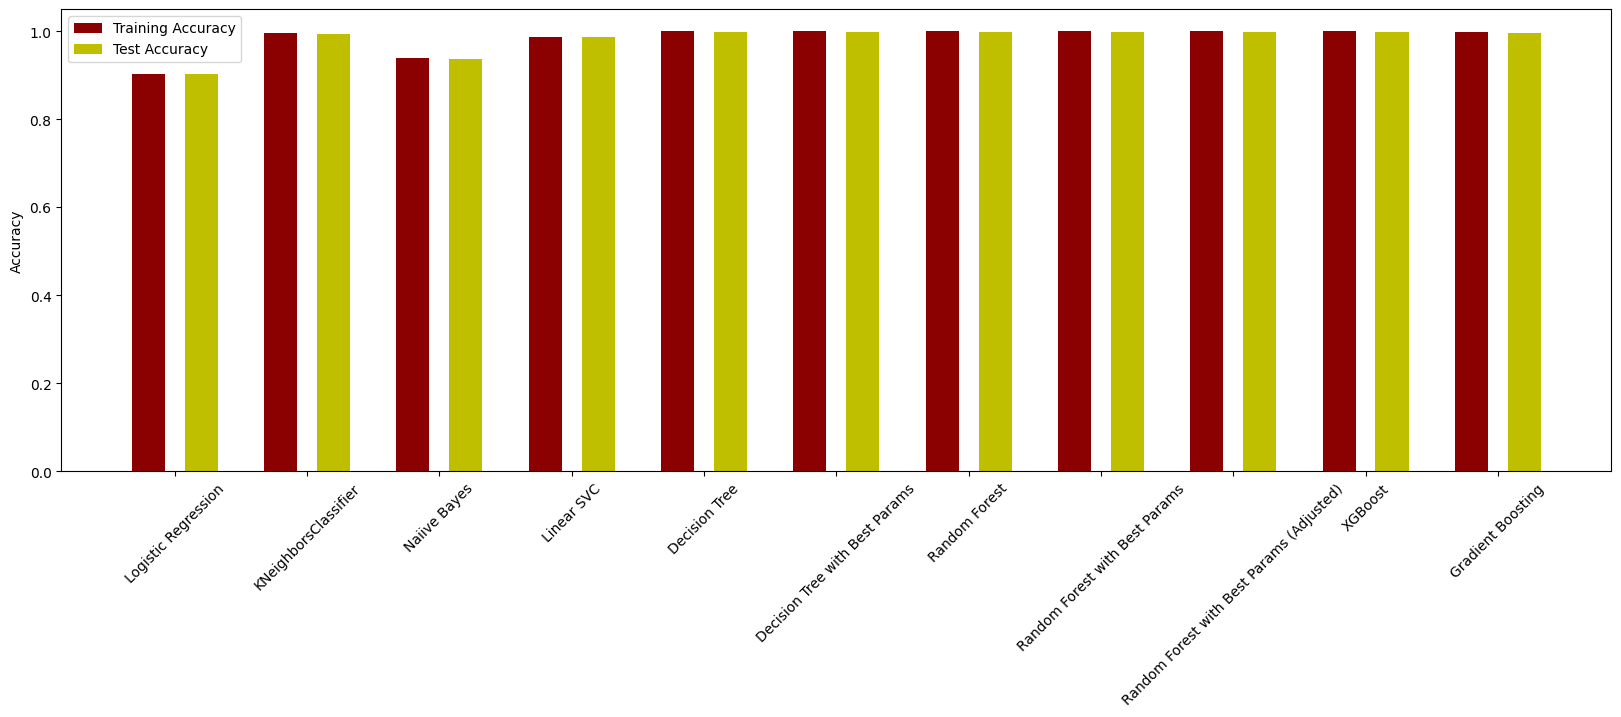

In [85]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

Precesion

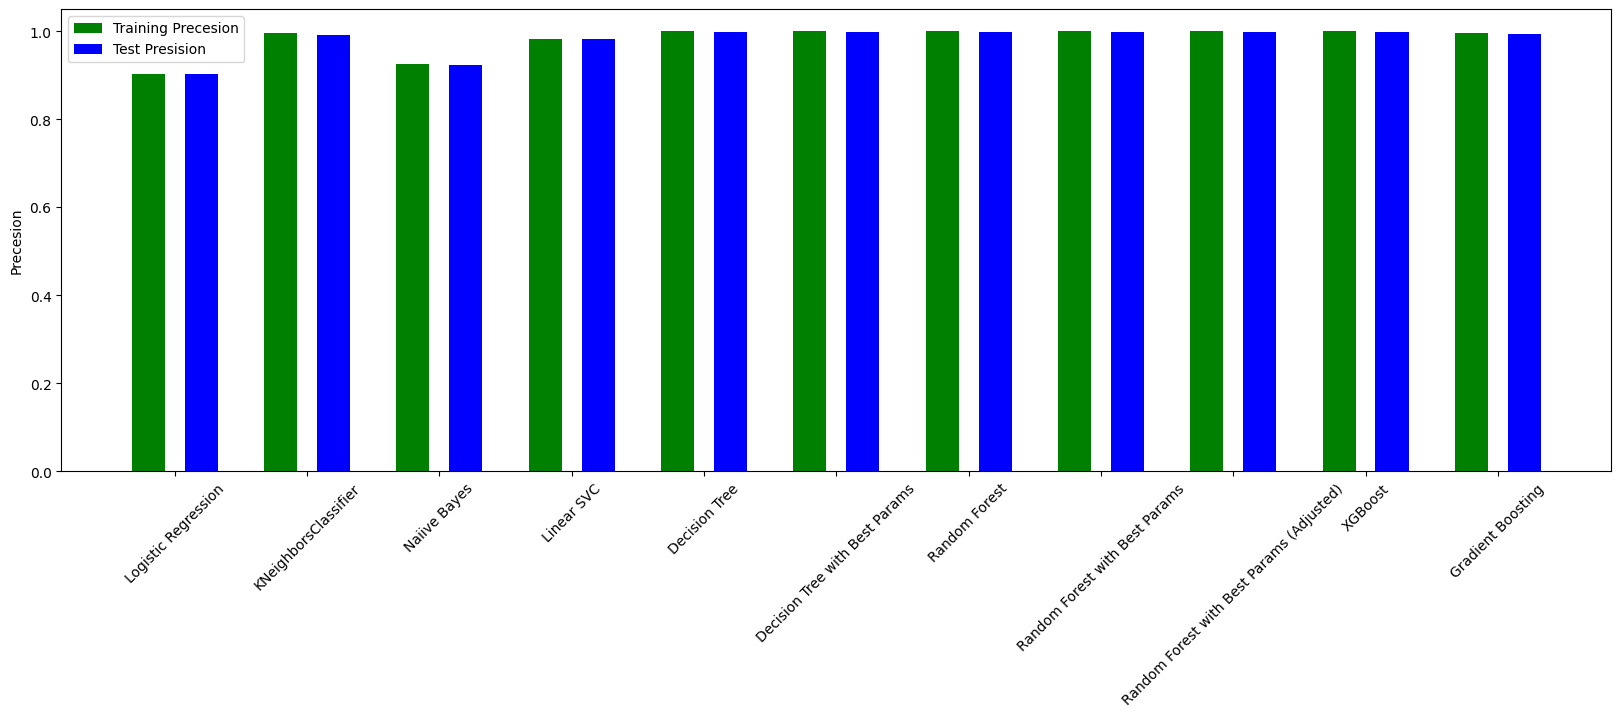

In [86]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.xticks(rotation=45)
plt.show()

Recall

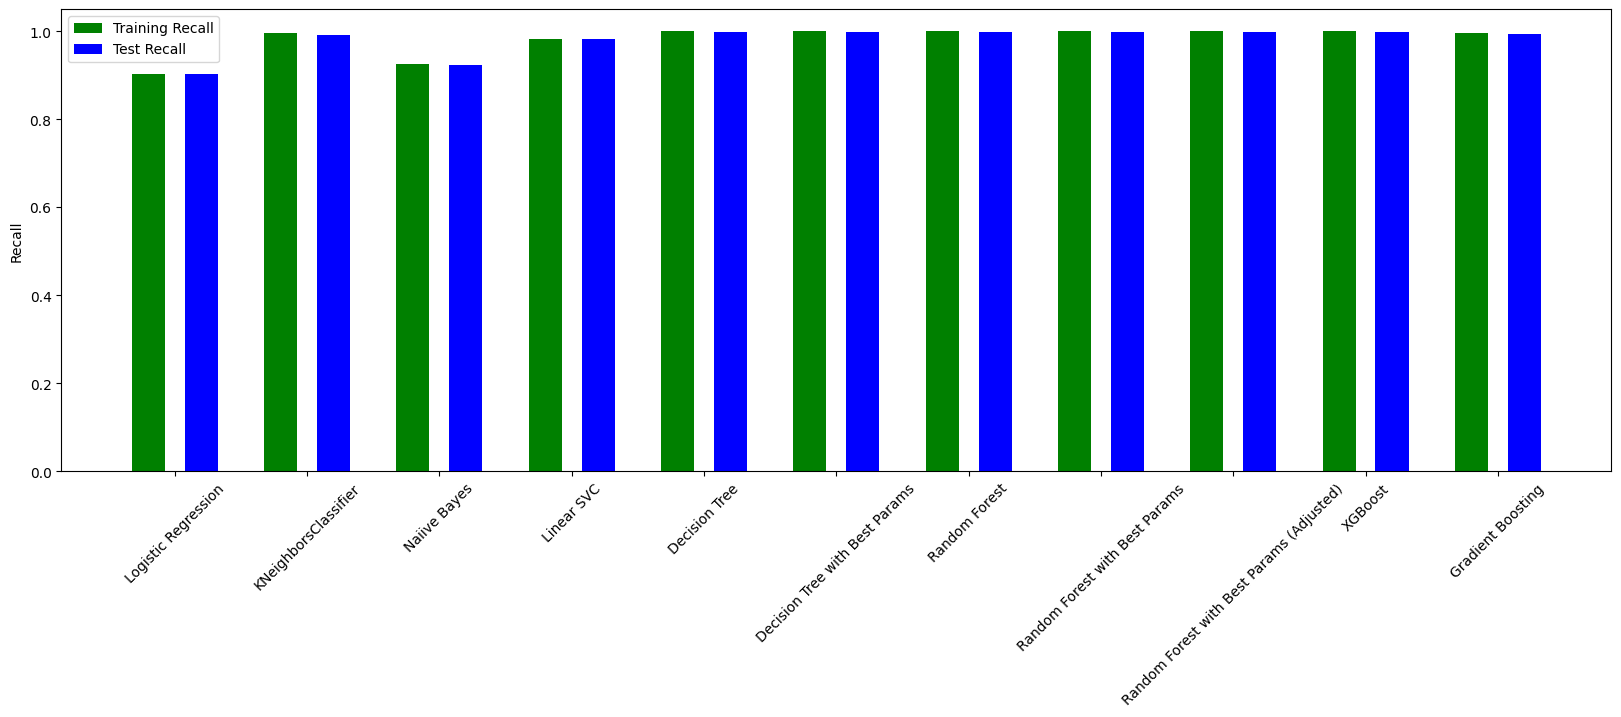

In [87]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[4] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[5] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.show()

# Classification outcome column (Using PCA analysis)

X ==> PCA analysis columns   and Y ==> outcome Column

Measuring effect of PCA (PCA + Logistic Regression)

Training Accuracy PCA Logistic Regression 92.26013872212906  Test Accuracy PCA Logistic Regression 92.19686445723357
Training Precesion PCA Logistic Regression 89.29053305676943  Test Precesion PCA Logistic Regression 89.48888710583327
Training Recall PCA Logistic Regression 94.69895986843511  Test Recall PCA Logistic Regression 94.44491489541875


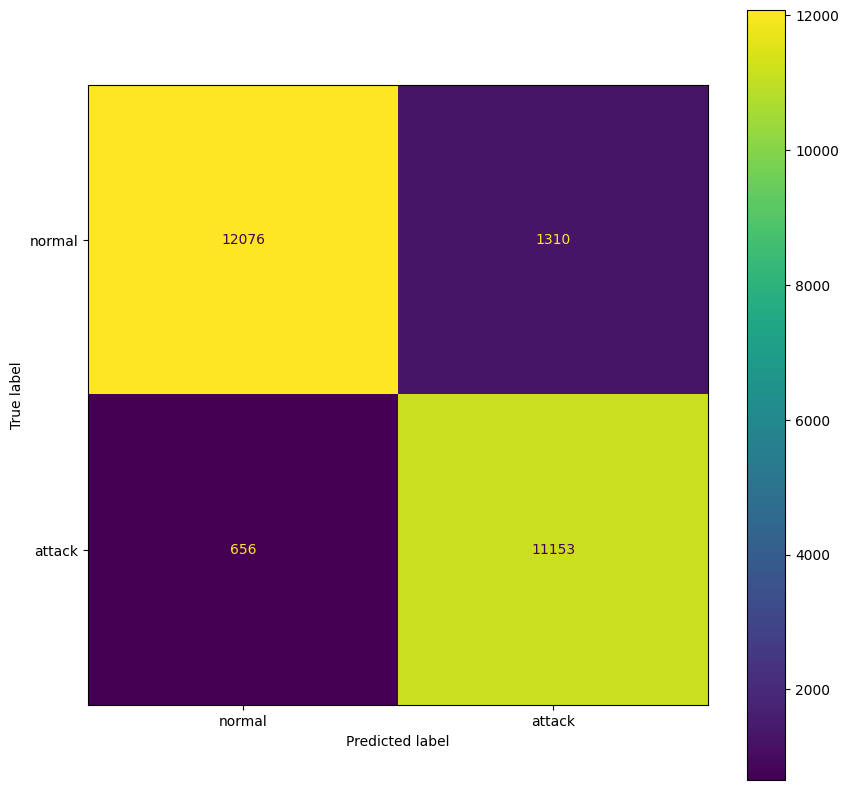

In [88]:
lrr = LogisticRegression().fit(x_train_reduced, y_train_reduced)
evaluate_classification(lrr, "PCA Logistic Regression", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + KNN)

Training Accuracy PCA KNN 99.56835389027259  Test Accuracy PCA KNN 99.34510815638023
Training Precesion PCA KNN 99.54922235515296  Test Precesion PCA KNN 99.2055442866802
Training Recall PCA KNN 99.52158219602315  Test Recall PCA KNN 99.39876365483953


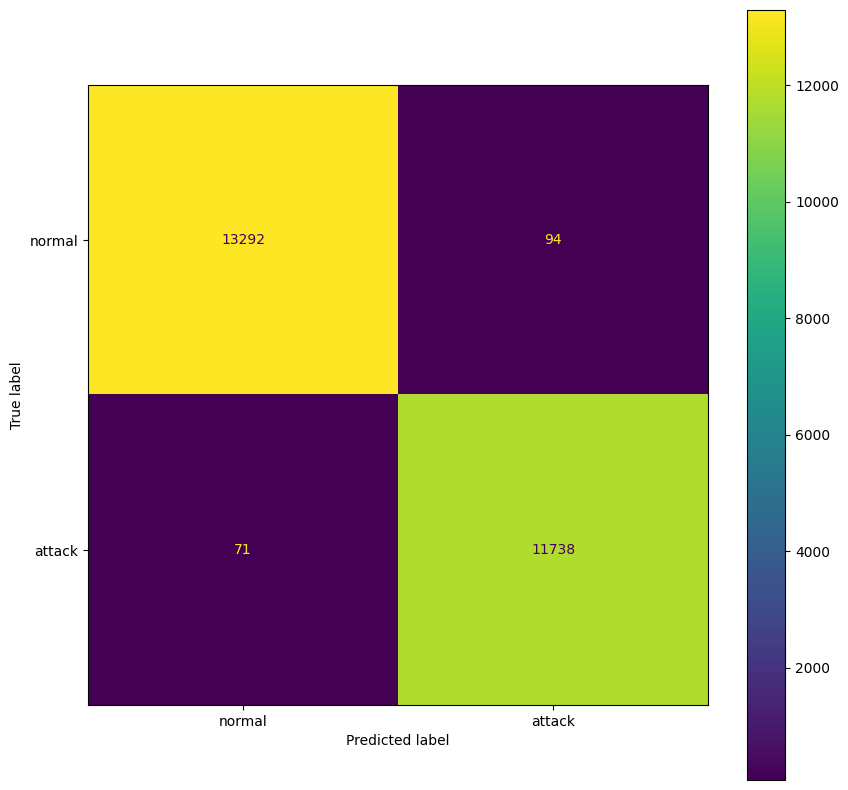

In [89]:
knnpca = KNeighborsClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(knnpca, "PCA KNN", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + Naiive Bayes)

Training Accuracy PCA Naiive Bayes 63.725850144378185  Test Accuracy PCA Naiive Bayes 63.31811867434015
Training Precesion PCA Naiive Bayes 84.23720899206191  Test Precesion PCA Naiive Bayes 83.34632372044688
Training Recall PCA Naiive Bayes 26.970803699194807  Test Recall PCA Naiive Bayes 27.165721060208313


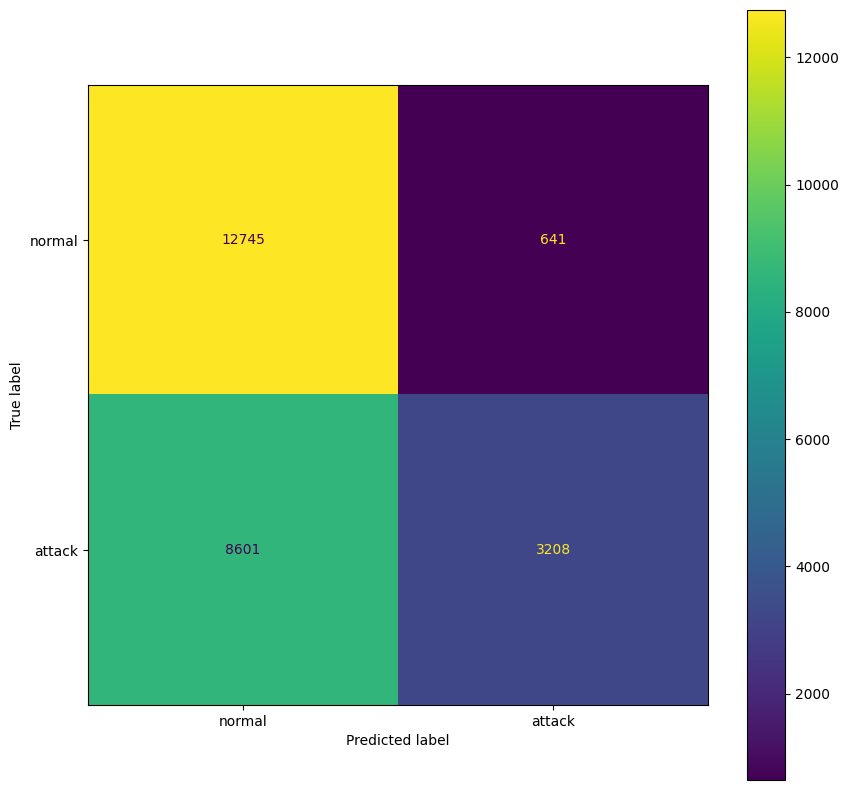

In [90]:
naivepca = GaussianNB().fit(x_train_reduced, y_train_reduced)
evaluate_classification(naivepca, "PCA Naiive Bayes", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + SVM)

Training Accuracy PCA SVM 97.78917808626969  Test Accuracy PCA SVM 97.77733677316928
Training Precesion PCA SVM 97.13548823541848  Test Precesion PCA SVM 97.22898648081284
Training Recall PCA SVM 98.13545204075095  Test Recall PCA SVM 98.05233296638157


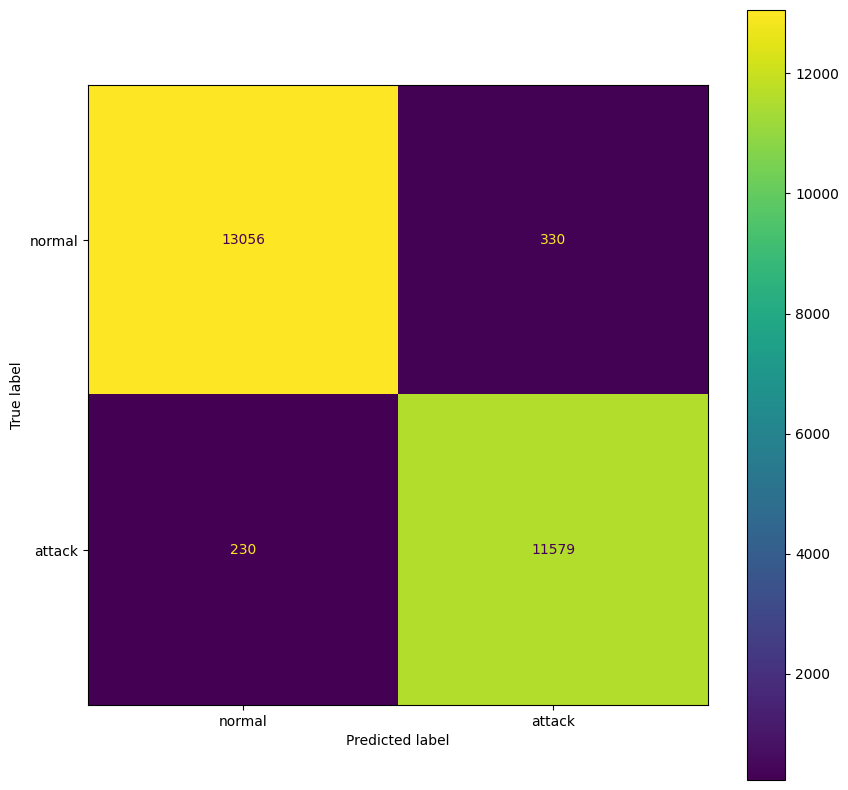

In [91]:
svv = svm.LinearSVC().fit(x_train_reduced, y_train_reduced)
evaluate_classification(svv, "PCA SVM", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + Decsion Tree)

Training Accuracy PCA Decsion Tree 100.0  Test Accuracy PCA Decsion Tree 99.82139313355825
Training Precesion PCA Decsion Tree 100.0  Test Precesion PCA Decsion Tree 99.79681679647815
Training Recall PCA Decsion Tree 100.0  Test Recall PCA Decsion Tree 99.8221695317131


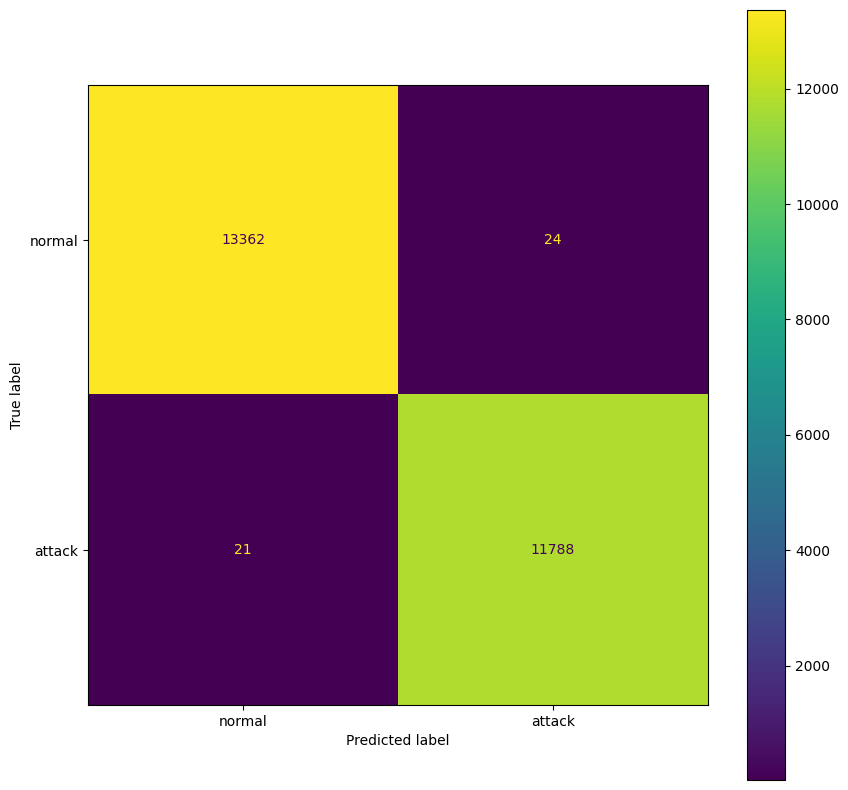

In [92]:
drr = DecisionTreeClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(drr, "PCA Decsion Tree", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Handle 100% Accuracy

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'criterion': 'entropy'}
Training Accuracy PCA Decision Tree with Best Params 99.96626214314774  Test Accuracy PCA Decision Tree with Best Params 99.84123834094066
Training Precesion PCA Decision Tree with Best Params 99.99145207821348  Test Precesion PCA Decision Tree with Best Params 99.80533220482437
Training Recall PCA Decision Tree with Best Params 99.93592618696738  Test Recall PCA Decision Tree with Best Params 99.85604200186299


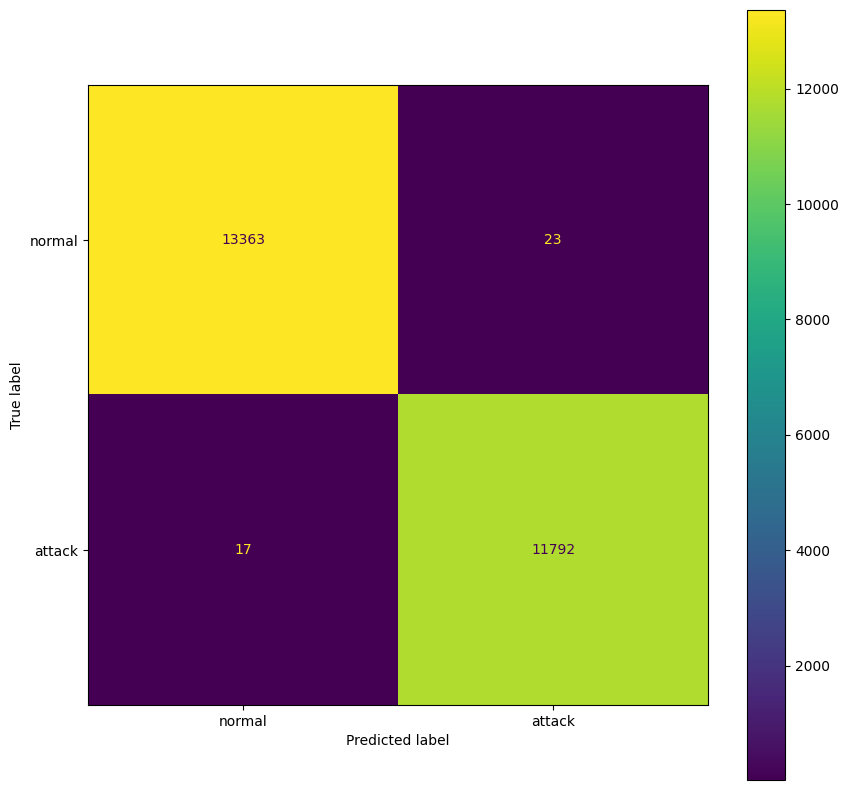

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter grid
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

# Fit the random search model
random_search.fit(x_train_reduced, y_train_reduced)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Decision Tree with the best parameters
dt_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_best.fit(x_train_reduced, y_train_reduced)

evaluate_classification(dt_best, "PCA Decision Tree with Best Params", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + Random Forest)

Training Accuracy PCA RandomForest 100.0  Test Accuracy PCA RandomForest 99.93252629489979
Training Precesion PCA RandomForest 100.0  Test Precesion PCA RandomForest 99.89844278943805
Training Recall PCA RandomForest 100.0  Test Recall PCA RandomForest 99.95765941231264


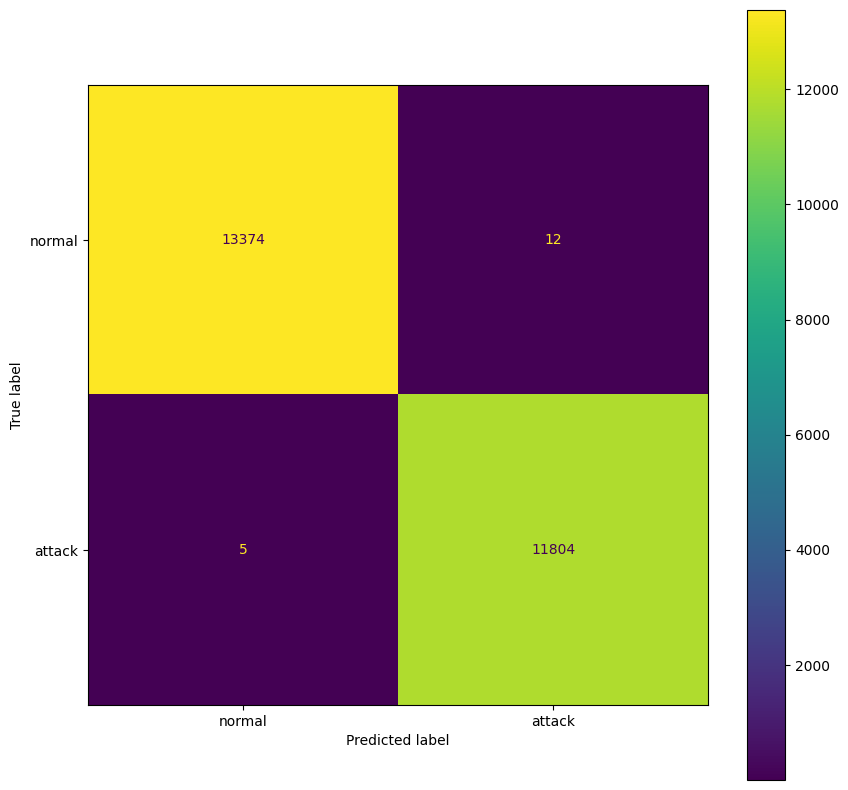

In [93]:
rrf = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(rrf, "PCA RandomForest", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Handle 100% Accuracy

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters (Adjusted): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50}
Training Accuracy PCA Random Forest with Best Params (Adjusted) 99.99305397064806  Test Accuracy PCA Random Forest with Best Params (Adjusted) 99.92061917047033
Training Precesion PCA Random Forest with Best Params (Adjusted) 99.98932171535965  Test Precesion PCA Random Forest with Best Params (Adjusted) 99.88997037663987
Training Recall PCA Random Forest with Best Params (Adjusted) 99.99572841246449  Test Recall PCA Random Forest with Best Params (Adjusted) 99.9407231772377


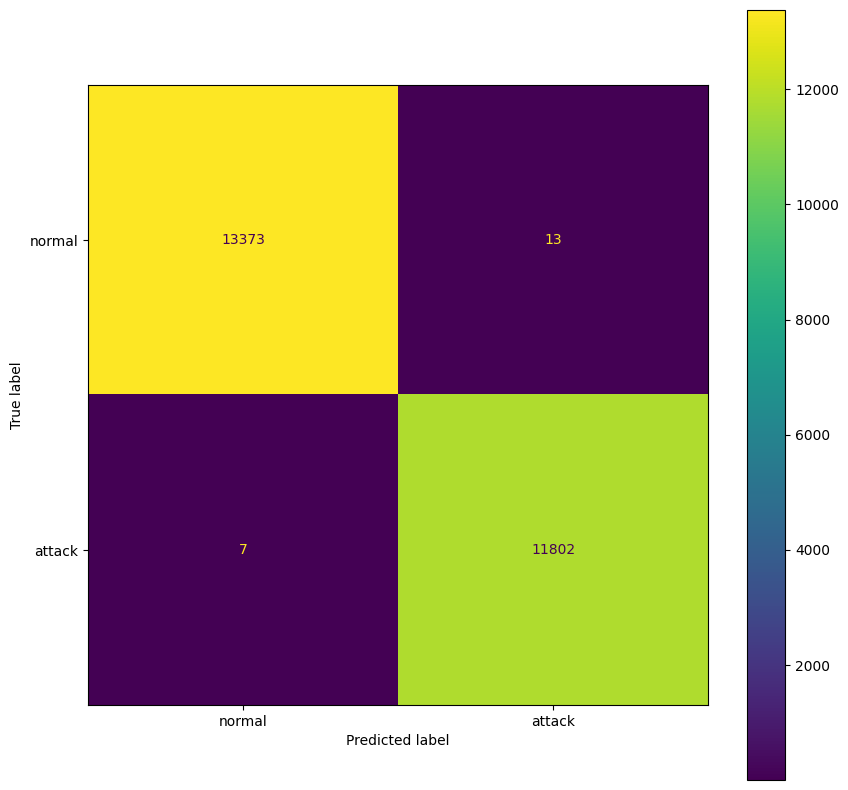

In [48]:
# Adjusted parameter grid for further tuning
param_dist_adjusted = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Classifier
rf_adjusted = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with the adjusted parameters
random_search_adjusted = RandomizedSearchCV(estimator=rf_adjusted, param_distributions=param_dist_adjusted, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the randomized search model
random_search_adjusted.fit(x_train_reduced, y_train_reduced)

# Get the best parameters
best_params_adjusted = random_search_adjusted.best_params_
print(f"Best parameters (Adjusted): {best_params_adjusted}")

# Train the Random Forest with the adjusted best parameters
rf_best_adjusted = RandomForestClassifier(**best_params_adjusted, random_state=42)
rf_best_adjusted.fit(x_train_reduced, y_train_reduced)

# Evaluate the tuned model
evaluate_classification(rf_best_adjusted, "PCA Random Forest with Best Params (Adjusted)", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + XGBoost)

Training Accuracy PCA XGBoost 99.93252428629549  Test Accuracy PCA XGBoost 99.88886683865846
Training Precesion PCA XGBoost 99.91672182955735  Test Precesion PCA XGBoost 99.86455599762974
Training Recall PCA XGBoost 99.93806198073514  Test Recall PCA XGBoost 99.89838258955034


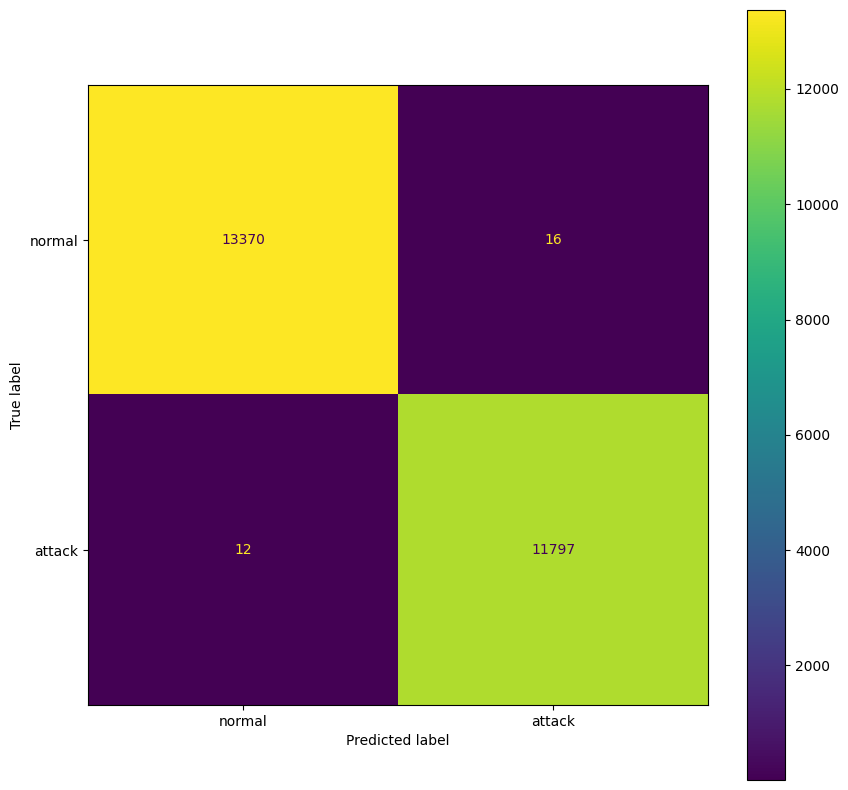

In [94]:
xgboostpca = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20).fit(x_train_reduced, y_train_reduced)
evaluate_classification(xgboostpca, "PCA XGBoost", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + Gradient Boosting)

Training Accuracy PCA Gradient Boosting 99.7023130277742  Test Accuracy PCA Gradient Boosting 99.63881722564001
Training Precesion PCA Gradient Boosting 99.55262989710488  Test Precesion PCA Gradient Boosting 99.47643979057592
Training Recall PCA Gradient Boosting 99.80777856090216  Test Recall PCA Gradient Boosting 99.75442459141333


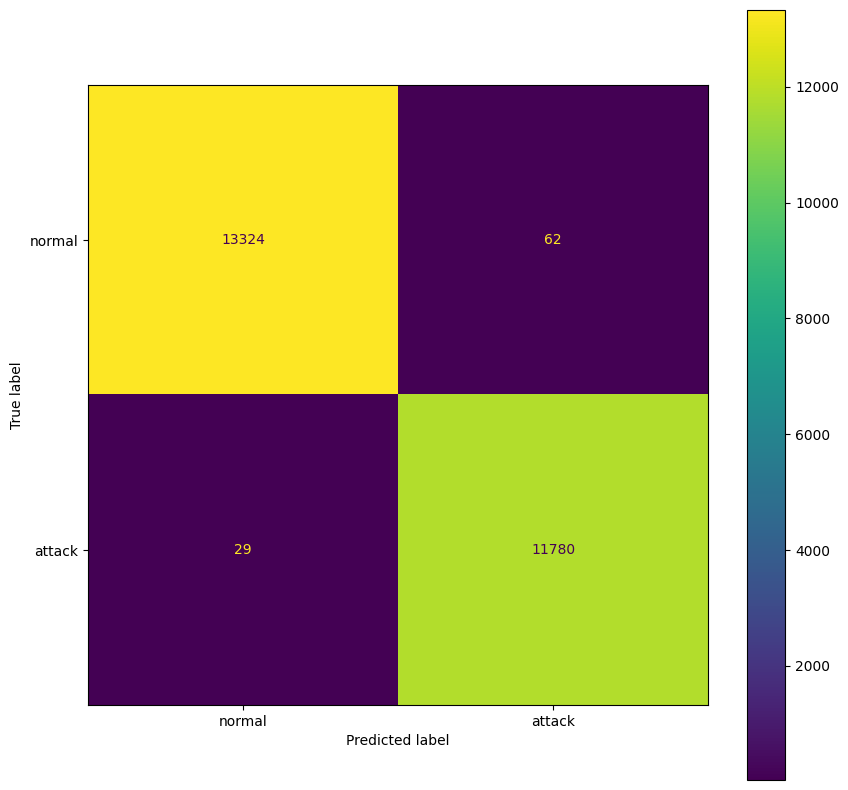

In [95]:
grb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42).fit(x_train_reduced, y_train_reduced)
evaluate_classification(grb, "PCA Gradient Boosting", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Recurrent Neural Network (RNN) ==> (5 Epochs)

In [96]:
# Ensure that x_train and x_test are in float format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train_reduced, epochs= 5, batch_size=64, validation_data=(X_test_rnn, y_test_reduced))

Epoch 1/5
1575/1575 [==============================] - 26s 10ms/step - loss: 0.0518 - accuracy: 0.9810 - val_loss: 0.0317 - val_accuracy: 0.9894
Epoch 2/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0247 - accuracy: 0.9912 - val_loss: 0.0218 - val_accuracy: 0.9907
Epoch 3/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0194 - accuracy: 0.9929 - val_loss: 0.0209 - val_accuracy: 0.9928
Epoch 4/5
1575/1575 [==============================] - 15s 9ms/step - loss: 0.0164 - accuracy: 0.9943 - val_loss: 0.0155 - val_accuracy: 0.9946
Epoch 5/5
1575/1575 [==============================] - 15s 10ms/step - loss: 0.0140 - accuracy: 0.9951 - val_loss: 0.0133 - val_accuracy: 0.9948


Convolutional Neural Network (CNN) ==> (5 Epochs)

In [97]:
#  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced
# Ensure the data is in float32 format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train_reduced, epochs=5, batch_size=64, validation_data=(X_test_cnn, y_test_reduced))

Epoch 1/5
1575/1575 [==============================] - 14s 7ms/step - loss: 2.2940 - accuracy: 0.9413 - val_loss: 0.7012 - val_accuracy: 0.9727
Epoch 2/5
1575/1575 [==============================] - 10s 7ms/step - loss: 1.2834 - accuracy: 0.9696 - val_loss: 1.9474 - val_accuracy: 0.9654
Epoch 3/5
1575/1575 [==============================] - 10s 7ms/step - loss: 0.4896 - accuracy: 0.9710 - val_loss: 0.6382 - val_accuracy: 0.9810
Epoch 4/5
1575/1575 [==============================] - 10s 6ms/step - loss: 0.2299 - accuracy: 0.9747 - val_loss: 1.0108 - val_accuracy: 0.9762
Epoch 5/5
1575/1575 [==============================] - 10s 7ms/step - loss: 0.1606 - accuracy: 0.9755 - val_loss: 1.3199 - val_accuracy: 0.9729


In [98]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 99.48%
CNN Test Accuracy: 97.29%


Recurrent Neural Network (RNN) ==> (10 Epochs)

In [99]:
# Ensure that x_train and x_test are in float format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train_reduced, epochs= 10, batch_size=64, validation_data=(X_test_rnn, y_test_reduced))

Epoch 1/10
1575/1575 [==============================] - 20s 10ms/step - loss: 0.0555 - accuracy: 0.9797 - val_loss: 0.0296 - val_accuracy: 0.9894
Epoch 2/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0250 - accuracy: 0.9914 - val_loss: 0.0239 - val_accuracy: 0.9921
Epoch 3/10
1575/1575 [==============================] - 15s 9ms/step - loss: 0.0185 - accuracy: 0.9936 - val_loss: 0.0149 - val_accuracy: 0.9954
Epoch 4/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0168 - val_accuracy: 0.9949
Epoch 5/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0140 - accuracy: 0.9950 - val_loss: 0.0172 - val_accuracy: 0.9938
Epoch 6/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0129 - accuracy: 0.9954 - val_loss: 0.0144 - val_accuracy: 0.9957
Epoch 7/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0122 - accuracy: 0.9956 - val_loss: 0.0128 - val_a

Convolutional Neural Network (CNN) ==> (10 Epochs)

In [100]:
#  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced
# Ensure the data is in float32 format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train_reduced, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test_reduced))

Epoch 1/10
1575/1575 [==============================] - 46s 7ms/step - loss: 2.9947 - accuracy: 0.9531 - val_loss: 1.4290 - val_accuracy: 0.9619
Epoch 2/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.8148 - accuracy: 0.9679 - val_loss: 1.1465 - val_accuracy: 0.9515
Epoch 3/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.3301 - accuracy: 0.9705 - val_loss: 0.7679 - val_accuracy: 0.9708
Epoch 4/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.2752 - accuracy: 0.9716 - val_loss: 1.2127 - val_accuracy: 0.9791
Epoch 5/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.5278 - accuracy: 0.9691 - val_loss: 0.6982 - val_accuracy: 0.9408
Epoch 6/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.2656 - accuracy: 0.9723 - val_loss: 0.7701 - val_accuracy: 0.9797
Epoch 7/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.1690 - accuracy: 0.9706 - val_loss: 0.6558 - val_ac

In [101]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 99.64%
CNN Test Accuracy: 98.38%


Recurrent Neural Network (RNN) ==> (50 Epochs)

In [102]:
# Ensure that x_train and x_test are in float format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train_reduced, epochs= 50, batch_size=64, validation_data=(X_test_rnn, y_test_reduced))

Epoch 1/50
1575/1575 [==============================] - 16s 9ms/step - loss: 0.0516 - accuracy: 0.9807 - val_loss: 0.0240 - val_accuracy: 0.9918
Epoch 2/50
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0221 - accuracy: 0.9923 - val_loss: 0.0191 - val_accuracy: 0.9939
Epoch 3/50
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0175 - accuracy: 0.9936 - val_loss: 0.0201 - val_accuracy: 0.9933
Epoch 4/50
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0143 - accuracy: 0.9950 - val_loss: 0.0162 - val_accuracy: 0.9944
Epoch 5/50
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0130 - accuracy: 0.9952 - val_loss: 0.0113 - val_accuracy: 0.9962
Epoch 6/50
1575/1575 [==============================] - 13s 9ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0133 - val_accuracy: 0.9952
Epoch 7/50
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0130 - val_ac

Convolutional Neural Network (CNN) ==> (50 Epochs)

In [103]:
#  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced
# Ensure the data is in float32 format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train_reduced, epochs = 50, batch_size=64, validation_data=(X_test_cnn, y_test_reduced))

Epoch 1/50
1575/1575 [==============================] - 11s 6ms/step - loss: 2.6540 - accuracy: 0.9524 - val_loss: 1.2219 - val_accuracy: 0.9701
Epoch 2/50
1575/1575 [==============================] - 9s 6ms/step - loss: 1.1900 - accuracy: 0.9678 - val_loss: 1.7823 - val_accuracy: 0.9809
Epoch 3/50
1575/1575 [==============================] - 9s 6ms/step - loss: 0.3747 - accuracy: 0.9730 - val_loss: 0.8227 - val_accuracy: 0.9773
Epoch 4/50
1575/1575 [==============================] - 9s 6ms/step - loss: 0.5142 - accuracy: 0.9726 - val_loss: 0.8903 - val_accuracy: 0.9656
Epoch 5/50
1575/1575 [==============================] - 10s 6ms/step - loss: 0.1928 - accuracy: 0.9748 - val_loss: 2.3134 - val_accuracy: 0.9797
Epoch 6/50
1575/1575 [==============================] - 9s 6ms/step - loss: 0.2224 - accuracy: 0.9763 - val_loss: 2.1021 - val_accuracy: 0.9342
Epoch 7/50
1575/1575 [==============================] - 9s 6ms/step - loss: 0.1328 - accuracy: 0.9757 - val_loss: 1.7966 - val_accurac

In [104]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 99.76%
CNN Test Accuracy: 98.23%


Recurrent Neural Network (RNN) ==> (100 Epochs)

In [105]:
# Ensure that x_train and x_test are in float format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train_reduced, epochs= 100, batch_size=64, validation_data=(X_test_rnn, y_test_reduced))

Epoch 1/100
1575/1575 [==============================] - 15s 8ms/step - loss: 0.0514 - accuracy: 0.9815 - val_loss: 0.0281 - val_accuracy: 0.9898
Epoch 2/100
1575/1575 [==============================] - 12s 8ms/step - loss: 0.0222 - accuracy: 0.9921 - val_loss: 0.0222 - val_accuracy: 0.9929
Epoch 3/100
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0176 - accuracy: 0.9939 - val_loss: 0.0158 - val_accuracy: 0.9946
Epoch 4/100
1575/1575 [==============================] - 12s 8ms/step - loss: 0.0147 - accuracy: 0.9945 - val_loss: 0.0151 - val_accuracy: 0.9952
Epoch 5/100
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0136 - accuracy: 0.9952 - val_loss: 0.0117 - val_accuracy: 0.9960
Epoch 6/100
1575/1575 [==============================] - 12s 8ms/step - loss: 0.0123 - accuracy: 0.9955 - val_loss: 0.0137 - val_accuracy: 0.9959
Epoch 7/100
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0107 - accuracy: 0.9963 - val_loss: 0.0119 -

Convolutional Neural Network (CNN) ==> (100 Epochs)

In [106]:
#  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced
# Ensure the data is in float32 format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train_reduced, epochs = 100, batch_size=64, validation_data=(X_test_cnn, y_test_reduced))

Epoch 1/100
1575/1575 [==============================] - 11s 6ms/step - loss: 2.5706 - accuracy: 0.9349 - val_loss: 4.7686 - val_accuracy: 0.9568
Epoch 2/100
1575/1575 [==============================] - 9s 6ms/step - loss: 0.8169 - accuracy: 0.9685 - val_loss: 1.5003 - val_accuracy: 0.9564
Epoch 3/100
1575/1575 [==============================] - 9s 6ms/step - loss: 0.4955 - accuracy: 0.9719 - val_loss: 0.5691 - val_accuracy: 0.9762
Epoch 4/100
1575/1575 [==============================] - 9s 6ms/step - loss: 0.3108 - accuracy: 0.9736 - val_loss: 0.5853 - val_accuracy: 0.9704
Epoch 5/100
1575/1575 [==============================] - 9s 6ms/step - loss: 0.1930 - accuracy: 0.9748 - val_loss: 1.0433 - val_accuracy: 0.9678
Epoch 6/100
1575/1575 [==============================] - 9s 6ms/step - loss: 0.1571 - accuracy: 0.9758 - val_loss: 0.7991 - val_accuracy: 0.9829
Epoch 7/100
1575/1575 [==============================] - 9s 6ms/step - loss: 0.1144 - accuracy: 0.9768 - val_loss: 0.3504 - val_a

In [107]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 99.80%
CNN Test Accuracy: 98.53%


# Comparison Between Model (Using PCA & Without PCA)

Accuracy

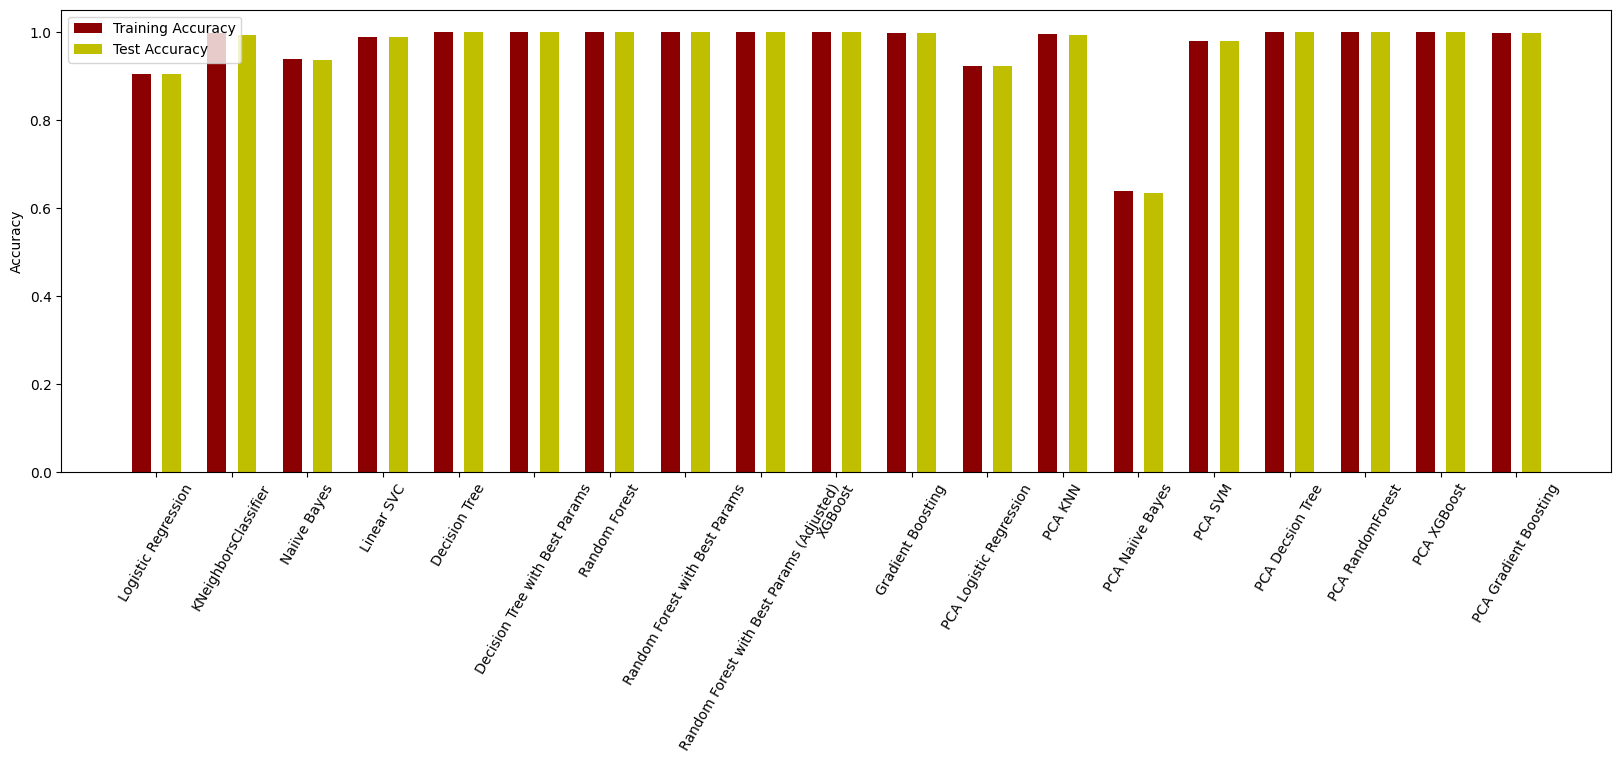

In [108]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.xticks(rotation=60)
plt.show()

Precesion

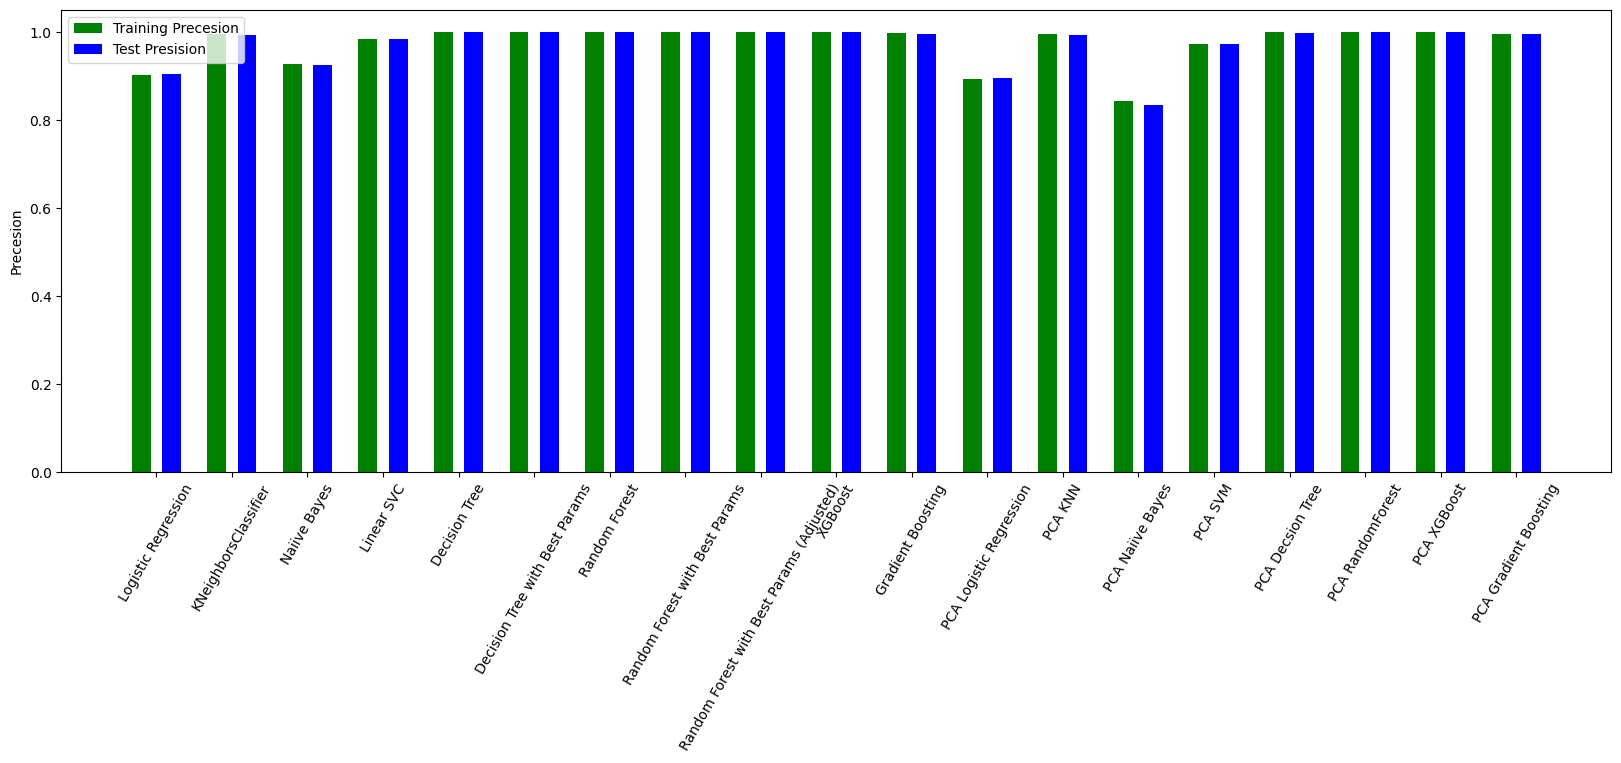

In [109]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.xticks(rotation=60)
plt.show()

Recall

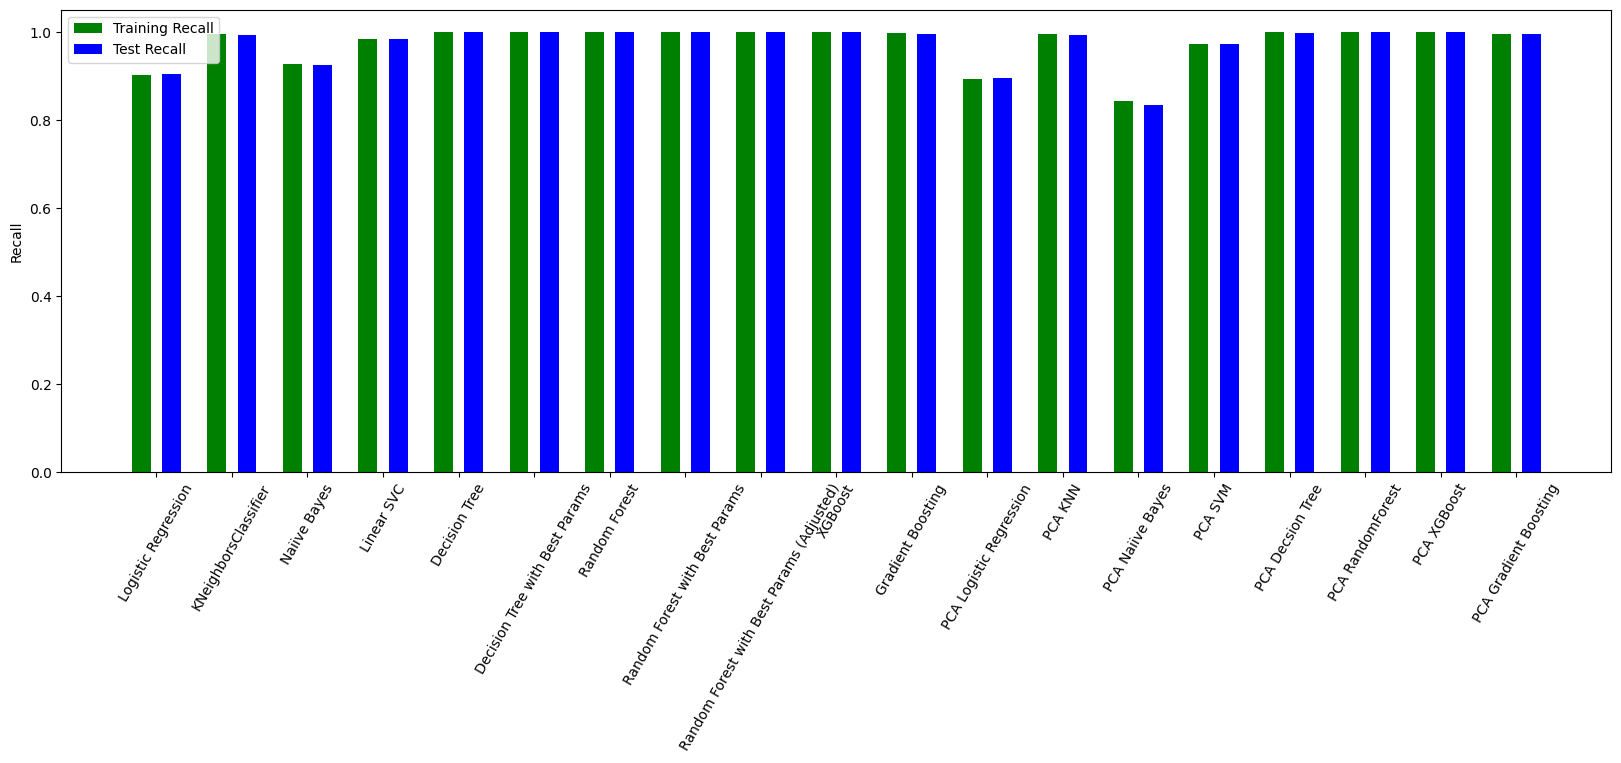

In [110]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[4] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[5] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.xticks(rotation=60)
plt.show()